# Prédire les résultats de Ligue 1 

Tout fan de foot s'est déjà demandé à quel point il est possible de prédire le résultat d'un match. S'il est impossible d'établir un modèle qui puisse le faire avec succès à tous les coups, en raison de l'aléa intrinsèque à une rencontre de sport, les paris sportifs existent pour une raison, il parait évident que certains indicateurs sont décisifs dans l'issue d'une rencontre. Il est bien connu que jouer à Domicile conduit à un taux de victoire plus élevé qu'à l'Extérieur, il parait évident que le classement des deux équipes joue aussi dans le résultat etc. Qui plus est nous disposons aujourd'hui d'un nombre très important de données variées sur les matchs qui se jouent chaque semaine. Nous nous sommes donc demandés comment nous pourrions prédire le mieux les résultats de la Ligue 1 avec les données que nous pourrions scrapper sur Internet. L'idée de ce projet est donc de trouver une approche permettant de prédire au mieux la Ligue 1 en manipulant de nombreuses statistiques sur les matchs. Grâce à cela nous pourrons établir un 'niveau de prédictibilité' des rencontres

# Première approche

Dans un premier temps, nous allons tenter de prédire les résultats de Ligue 1 pour la saison en cours, à partir d'une base de donnée constituée de certaines données basiques sur l'ensemble des saisons depuis 2002-2003. Ces données seront, pour chaque match: la journée, le lieu du match, les deux équipes, le score, le classement des deux équipes. A partir de ces données nous allons pouvoir créer différents indicateurs comme la moyenne de buts marqués ou encore la forme des équipes et essayer de prédire les futures résultats. 

In [11]:
from fonctions import *
pd.set_option('display.max_columns', None)


## Scrapping des données 

Nous commençons par scrapper nos données. Nous scrappons d'abord l'ensemble des résultats sur le site *fbref.com*. Nous créons à partir de ce scrapping un **DataFrame** avec 7 colonnes:

la saison, la journée, l'équipe domicile, l'équipe extérieur, le nombre de buts de l'équipe domicile, le nombre de buts de l'équipe extérieure et le résultat (1 = victoire domicile, 0 = match nul, -1 = victoire extérieur)

On enregistre le **DataFrame** au format csv.

In [2]:
noms_colonnes = ['Saison','Journée','Domicile','Extérieur','Buts domicile','Buts extérieur','Résultat']     #on crée un dataframe vide qui contiendra tous les résultats de la Ligue 1 depuis 2002
dataframe_resultats = pd.DataFrame(columns=noms_colonnes)
for i in range (2002, 2023):                                                                                #on utilise la fonction précédente pour récupérer les résultats de chaque saison
    resultats_finaux, affiches = fonction_resultats(i)
    dataframe_resultats = dataframe_resultats._append(resultats_finaux, ignore_index=True)

dataframe_resultats.to_csv('dataframe_résultats.csv', encoding = 'utf-8', index=False)              #on sauvegarde le dataframe des résultats de ligue 1 de 2002-2003 à 2022-2023 dans un fichier csv


c:\Users\vtgra\Desktop\Projet python\Fbref_alex\fonctions.py:36: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0].dropna(subset = 'Wk').dropna(subset = 'Score').reset_index(drop=True)
c:\Users\vtgra\Desktop\Projet python\Fbref_alex\fonctions.py:36: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0].dropna(subset = 'Wk').dropna(subset = 'Score').reset_index(drop=True)
c:\Users\vtgra\Desktop\Projet python\Fbref_alex\fonctions.py:36: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0].dropna(subset = 'Wk').dropna(subset = 'Score').reset_

## Création du **DataFrame** final pour l'implémentation de modèles prédictifs

A partir de ce **DataFrame**, nous créons un nouveau **DataFrame** avec l'ensemble des informations que nous souhaitions avoir pour tenter de prédire les résultats futurs. Nous remplaçons 'Equipe à Domicile', 'Equipe à l'extérieur' par 'Equipe 1', 'Equipe 2', nous ajoutons une colonne valant si l'Equipe 1 est à domicile, 0 sinon, et nous créons un double de notre **DataFrame** en inversant Equipe 1 et Equipe 2, puis nous ajoutons les deux **DataFrame** de sorte à avoir, pour chaque équipe, l'ensemble de ses matchs en tant qu'Equipe 1. Ensuite nous ajoutons le classement à chaque journée des équipes de sorte à avoir pour chaque match le classement des deux équipes avant le match. Nous créons alors les colonnes suivantes : 'Moyenne buts marqués par 1', 'Moyennes buts marqués par 2', 'Moyenne buts marqués par 1 à domicile', 'Moyenne buts marqués par 1 à l'extérieur', 'Moyenne buts marqués par 2 à domicile', 'Moyenne buts marqués par 2 à l'extérieur', 'Moyenne buts encaissés par 1', 'Moyenne buts encaissés par 2','Moyenne buts encaissés par 1 à domicile', 'Moyenne buts encaissés par 1 à l'extérieur', 'Moyenne buts encaissés par 2 à domicile', 'Moyenne buts encaissés par 2 à l'extérieur', 'Forme Equipe 1', 'Forme Equipe 2' et  'Historique des confrontations'. La forme est un indicateur sur les 5 derniers matchs d'une équipe dans la saison, simplement en faisant la somme des résultats. 

*Avec notre fonction nous pouvons choisir d'avoir les indicateurs avant ou après le match. Le **DataFrame** avec les indicateurs avant le match nous sera utile pour les prédictions. Celui après le match est plus adapté aux statistiques descriptives puisqu'il n'y a pas la perte de donnée du dernier match de chaque saison.*

In [3]:
dataframe_resultats = pd.read_csv('dataframe_résultats.csv', encoding = 'utf-8')     #on récupère le dataframe des résultats de ligue 1 de 2002-2003 à 2022-2023
dataframe_stats = fonction_prepa_base(dataframe_resultats, 0)   #On applique la fonction précédente pour avoir notre dataframe qui nous servira pour les statistiques descriptives
dataframe_resultats = pd.read_csv('dataframe_résultats.csv', encoding = 'utf-8')     
dataframe_final = fonction_prepa_base(dataframe_resultats, 1)   #On applique la fonction précédente pour avoir notre dataframe qui nous servira pour les modèles 

dataframe_final.to_csv('dataframe_final.csv', encoding = 'utf-8', index=False)  #On sauvegarde le dataframe dans un fichier csv


## Statistiques descriptives 

Dans cette première approche nous avons beaucoup d'observations mais assez peu de variables en comparaison avec notre deuxième approche. Nous pouvons tout de même visualiser quelques statistiques descriptives. 

*On peut d'abord regarder à quoi ressemble nos deux **DataFrames** avec la première saison de celui pour les statistiques descriptives et les 10 premières lignes pour l'autre*

In [4]:
dataframe_stats.head(38)

,Saison,Journée,Equipe 1,Equipe 2,Lieu,Buts Equipe 1,Buts Equipe 2,Résultat,Classement Equipe 1,Classement Equipe 2,Moyenne_BM par 1,Moyenne_BM par 2,Moyenne_BM par 1 à Domicile,Moyenne_BM par 2 à Domicile,Moyenne_BM par 1 à Extérieur,Moyenne_BM par 2 à Extérieur,Moyenne_BE par 1,Moyenne_BE par 2,Moyenne_BE par 1 à Domicile,Moyenne_BE par 2 à Domicile,Moyenne_BE par 1 à Extérieur,Moyenne_BE par 2 à Extérieur,Forme 1,Forme 2,Historique
0,2002-2003,1,Ajaccio,Strasbourg,Extérieur,1,1,Nul,9,12,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,0.0,0.0,0
1,2002-2003,2,Ajaccio,Guingamp,Domicile,0,2,Défaite,16,4,0.500000,2.500000,0.000000,3.000000,1.000000,2.000000,1.500000,1.500000,2.000000,3.000000,1.000000,0.000000,-1.0,1.0,-1
2,2002-2003,3,Ajaccio,Paris Saint Germain,Extérieur,2,2,Nul,15,10,1.000000,1.000000,0.000000,1.500000,1.500000,0.000000,1.666667,0.666667,2.000000,1.000000,1.500000,0.000000,-1.0,1.0,0
3,2002-2003,4,Ajaccio,Sedan,Domicile,1,0,Victoire,13,20,1.000000,0.250000,0.500000,0.000000,1.500000,0.500000,1.250000,2.000000,1.000000,0.500000,1.500000,3.500000,0.0,-3.0,1
4,2002-2003,5,Ajaccio,Troyes,Extérieur,0,1,Défaite,15,16,0.800000,0.400000,0.500000,0.666667,1.000000,0.000000,1.200000,1.200000,1.000000,2.000000,1.333333,0.000000,-1.0,-1.0,-1
5,2002-2003,6,Ajaccio,Montpellier,Domicile,0,0,Nul,15,17,0.666667,0.333333,0.333333,0.333333,1.000000,0.333333,1.000000,0.833333,0.666667,0.333333,1.333333,1.333333,-1.0,-3.0,0
6,2002-2003,7,Ajaccio,Bastia,Extérieur,2,1,Victoire,12,15,0.857143,1.000000,0.333333,1.500000,1.250000,0.333333,1.000000,1.428571,0.666667,1.000000,1.250000,2.000000,1.0,-1.0,1
7,2002-2003,8,Ajaccio,Sochaux,Domicile,0,1,Défaite,13,7,0.750000,1.375000,0.250000,2.333333,1.250000,0.800000,1.000000,1.000000,0.750000,1.333333,1.250000,0.800000,0.0,1.0,-1
8,2002-2003,9,Ajaccio,Marseille,Extérieur,1,3,Défaite,17,3,0.777778,1.444444,0.250000,1.200000,1.200000,1.750000,1.222222,1.000000,0.750000,1.000000,1.600000,1.000000,-2.0,2.0,-1
9,2002-2003,10,Ajaccio,Nantes,Domicile,1,0,Victoire,13,16,0.800000,1.000000,0.400000,1.250000,1.200000,0.833333,1.100000,1.500000,0.600000,1.500000,1.600000,1.500000,0.0,-3.0,1


In [5]:
dataframe_final.head(10)

,Saison,Journée,Equipe 1,Equipe 2,Equipe 1 à Domicile,Buts Equipe 1,Buts Equipe 2,Résultat,Classement Equipe 1,Classement Equipe 2,Moyenne_BM par 1,Moyenne_BM par 2,Moyenne_BM par 1 à Domicile,Moyenne_BM par 2 à Domicile,Moyenne_BM par 1 à Extérieur,Moyenne_BM par 2 à Extérieur,Moyenne_BE par 1,Moyenne_BE par 2,Moyenne_BE par 1 à Domicile,Moyenne_BE par 2 à Domicile,Moyenne_BE par 1 à Extérieur,Moyenne_BE par 2 à Extérieur,Forme 1,Forme 2,Historique
0,2002-2003,1,Ajaccio,Strasbourg,0,1,1,0,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2002-2003,2,Ajaccio,Guingamp,1,0,2,-1,9,7,1.000000,3.000000,NaN,3.000000,1.00,NaN,1.000000,3.000000,NaN,3.000000,1.000000,NaN,0.0,0.0,0
2,2002-2003,3,Ajaccio,Paris Saint Germain,0,2,2,0,16,6,0.500000,0.500000,0.000000,1.000000,1.00,0.000000,1.500000,0.000000,2.000000,0.000000,1.000000,0.0,-1.0,1.0,0
3,2002-2003,4,Ajaccio,Sedan,1,1,0,1,15,19,1.000000,0.333333,0.000000,0.000000,1.50,1.000000,1.666667,2.333333,2.000000,0.500000,1.500000,6.0,-1.0,-2.0,0
4,2002-2003,5,Ajaccio,Troyes,0,0,1,-1,13,17,1.000000,0.250000,0.500000,0.500000,1.50,0.000000,1.250000,1.500000,1.000000,3.000000,1.500000,0.0,0.0,-2.0,0
5,2002-2003,6,Ajaccio,Montpellier,1,0,0,0,15,17,0.800000,0.400000,0.500000,0.333333,1.00,0.500000,1.200000,1.000000,1.000000,0.333333,1.333333,2.0,-1.0,-2.0,0
6,2002-2003,7,Ajaccio,Bastia,0,2,1,1,15,12,0.666667,1.000000,0.333333,1.666667,1.00,0.333333,1.000000,1.333333,0.666667,0.666667,1.333333,2.0,-1.0,-1.0,0
7,2002-2003,8,Ajaccio,Sochaux,1,0,1,-1,12,10,0.857143,1.428571,0.333333,2.333333,1.25,0.750000,1.000000,1.142857,0.666667,1.333333,1.250000,1.0,1.0,1.0,0
8,2002-2003,9,Ajaccio,Marseille,0,1,3,-1,13,4,0.750000,1.250000,0.250000,0.750000,1.25,1.750000,1.000000,1.000000,0.750000,1.000000,1.250000,1.0,0.0,2.0,0
9,2002-2003,10,Ajaccio,Nantes,1,1,0,1,17,13,0.777778,1.111111,0.250000,1.250000,1.20,1.000000,1.222222,1.555556,0.750000,1.500000,1.600000,1.6,-2.0,-3.0,0


*Affichons ensuites les occurences du nombre de buts marqués par match par une équipe sur toutes les saisons*

In [6]:
display(dataframe_stats.groupby(['Saison'])['Buts Equipe 1'].value_counts().unstack().fillna(0).astype(int))

Buts Equipe 1,0,1,2,3,4,5,6,7,8,9
Saison,,,,,,,,,,
2002-2003,277,251,147,56,24,2,3,0,0,0
2003-2004,250,269,147,62,26,5,1,0,0,0
2004-2005,268,265,152,54,13,7,0,0,1,0
2005-2006,278,273,129,51,25,0,2,1,1,0
2006-2007,250,272,150,71,15,2,0,0,0,0
2007-2008,262,258,141,77,15,5,2,0,0,0
2008-2009,240,273,172,59,16,0,0,0,0,0
2009-2010,241,274,139,68,30,8,0,0,0,0
2010-2011,233,272,177,55,17,5,1,0,0,0


*Puis par équipe*

In [7]:
display(dataframe_stats.groupby(['Equipe 1'])['Buts Equipe 1'].value_counts().unstack().fillna(0).astype(int))

Buts Equipe 1,0,1,2,3,4,5,6,7,8,9
Equipe 1,,,,,,,,,,
Ajaccio,126,113,49,11,5,0,0,0,0,0
Amiens,41,37,18,6,2,0,0,0,0,0
Angers,102,106,59,23,2,2,0,0,0,0
Arles-Avignon,23,11,2,2,0,0,0,0,0,0
Auxerre,135,149,95,24,13,2,0,0,0,0
Bastia,119,104,56,17,8,0,0,0,0,0
Bordeaux,212,270,159,75,27,4,3,0,0,0
Boulogne,19,10,6,3,0,0,0,0,0,0
Brest,82,99,58,10,4,3,0,0,0,0


*Affichons le nombre de journées occupé à chaque place par chaque équipe*

In [8]:
display(dataframe_stats.groupby(['Equipe 1'])['Classement Equipe 1'].value_counts().unstack().fillna(0).astype(int))

Classement Equipe 1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Equipe 1,,,,,,,,,,,,,,,,,,,,
Ajaccio,0,1,0,2,0,1,4,2,5,7,3,4,20,11,30,29,42,53,45,45
Amiens,0,0,0,0,0,0,0,0,3,1,2,2,16,7,8,20,23,13,8,1
Angers,3,12,11,9,9,6,7,16,23,20,16,39,18,31,12,8,8,7,12,27
Arles-Avignon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,36
Auxerre,8,19,18,39,34,23,20,12,13,20,14,21,22,27,26,25,29,18,16,14
Bastia,1,3,3,1,5,4,5,7,12,17,25,33,40,34,30,21,12,15,27,9
Bordeaux,27,69,39,43,43,64,71,54,64,47,39,40,38,29,17,18,12,10,13,13
Boulogne,0,0,0,0,0,0,1,2,0,0,1,1,0,1,0,2,1,1,27,1
Brest,2,1,1,1,2,4,4,4,6,9,23,30,31,32,31,23,16,17,10,9


*Affichons les résultats de chaque équipe*

In [9]:
display(dataframe_stats.groupby('Equipe 1')['Résultat'].value_counts().unstack().fillna(0).astype(int))

Résultat,Défaite,Nul,Victoire
Equipe 1,,,
Ajaccio,147,91,66
Amiens,48,31,25
Angers,133,79,82
Arles-Avignon,24,11,3
Auxerre,144,120,154
Bastia,133,80,91
Bordeaux,226,234,290
Boulogne,21,10,7
Brest,113,73,70


*Affichons les résultats en fonction du classement avant le match*

In [10]:
resultats_counts =  dataframe_final.groupby('Classement Equipe 1')['Résultat'].value_counts().unstack().fillna(0).astype(int)
resultats_counts.columns = ['Défaite', 'Nul', 'Victoire']
display(resultats_counts)

,Défaite,Nul,Victoire
Classement Equipe 1,,,
1,144,182,440
2,199,205,363
3,216,198,353
4,221,230,316
5,251,224,292
6,231,218,318
7,265,228,274
8,270,226,271
9,264,231,272


*Affichons les résultats en fonction de Domicile/Extérieur*

In [11]:
display(dataframe_stats.groupby('Lieu')['Résultat'].value_counts().unstack().fillna(0).astype(int))

Résultat,Défaite,Nul,Victoire
Lieu,,,
Domicile,2123,2208,3548
Extérieur,3548,2208,2123


*Affichons le nombre de buts marqué en fonction de Domicile/Extérieur*

In [12]:
display(dataframe_stats.groupby('Lieu')['Buts Equipe 1'].value_counts().unstack().fillna(0).astype(int))

Buts Equipe 1,0,1,2,3,4,5,6,7,8,9
Lieu,,,,,,,,,,
Domicile,1943,2729,1856,873,341,97,33,3,3,1
Extérieur,2883,2805,1439,535,165,39,8,4,0,1


*Affichons les résultats en fonction de la forme des équipes avant le match.*

*La valeur de forme est égale à (nombre de victoires - nombre de défaites) sur les 5 derniers matchs*

In [13]:
resultats_counts =  dataframe_final.groupby('Forme 1')['Résultat'].value_counts().unstack().fillna(0).astype(int)
resultats_counts.columns = ['Défaite', 'Nul', 'Victoire']
display(resultats_counts)

,Défaite,Nul,Victoire
Forme 1,,,
-5.0,84,40,23
-4.0,178,121,138
-3.0,488,302,338
-2.0,751,547,617
-1.0,1032,780,878
0.0,1028,787,1019
1.0,895,728,989
2.0,590,527,680
3.0,326,297,488


*Affichons un tableau à double entrée des historiques entre les équipes.*

*La valeur affichée représente (nombre de victoires - nombre de défaites) de l'Equipe 1 contre l'Equipe 2*

In [14]:
display(pd.pivot_table(dataframe_stats, values='Historique', index='Equipe 1', columns='Equipe 2', aggfunc='last').fillna(0).astype(int))

Equipe 2,Ajaccio,Amiens,Angers,Arles-Avignon,Auxerre,Bastia,Bordeaux,Boulogne,Brest,Caen,Clermont Foot,Dijon,Evian,Gazélec Ajaccio,Grenoble,Guingamp,Istres,Le Havre,Le Mans,Lens,Lille,Lorient,Lyon,Marseille,Metz,Monaco,Montpellier,Nancy,Nantes,Nice,Nîmes,Paris Saint Germain,Reims,Rennes,Saint-Étienne,Sedan,Sochaux,Strasbourg,Toulouse,Troyes,Valenciennes
Equipe 1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ajaccio,0,0,2,0,-3,0,-5,0,2,0,-2,1,-1,0,0,-5,1,0,1,-2,-10,-4,-9,-2,-2,-6,-5,1,-4,-8,0,-5,-1,-5,-4,1,-2,-2,-1,-3,1
Amiens,0,0,-2,0,0,0,-1,0,0,0,0,2,0,0,0,3,0,0,0,0,1,0,-4,-3,2,-4,-3,0,-3,-1,0,-4,1,-3,-2,0,0,0,-1,-1,0
Angers,-2,2,0,0,0,2,2,0,0,6,-3,5,0,1,0,-1,0,0,0,-2,2,0,-9,-5,2,-10,0,0,-5,-4,0,-14,-2,-8,-6,0,0,-1,-4,3,0
Arles-Avignon,0,0,0,0,-1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,-1,-1,-2,0,-1,-1,0,0,-1,0,-2,0,-2,-2,0,-2,0,0,0,-2
Auxerre,3,0,0,1,0,1,-3,0,-2,1,-1,1,-2,0,1,3,-1,4,4,-3,-1,4,-11,-7,4,-1,-1,-2,2,-1,0,-5,-1,3,0,2,7,2,3,5,1
Bastia,0,0,-2,0,-1,0,0,0,0,2,0,1,-1,-2,0,-2,0,0,0,0,-6,1,-5,-8,-2,-9,0,1,-1,1,0,-10,2,5,-8,-1,-1,-2,5,1,0
Bordeaux,5,1,-2,1,3,0,0,1,0,0,-1,4,5,-1,3,8,1,2,3,0,-4,7,-8,-3,10,3,1,5,6,0,0,-9,-5,5,6,2,6,-4,2,6,5
Boulogne,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,-1,0,-2,0,-1,-2,0,-2,-2,0,0,0,0,-2,0,0,0,0,1,0,-1,0,-1
Brest,-2,0,0,0,2,0,0,0,0,0,3,1,3,0,0,0,0,0,0,1,-4,-3,-3,-4,1,-1,-6,-2,-3,-3,-2,-12,-1,-7,0,0,-1,-1,-2,2,1


## Quelques graphiques

*Regardons pour commencer l'évolution du nombre de buts par saison*

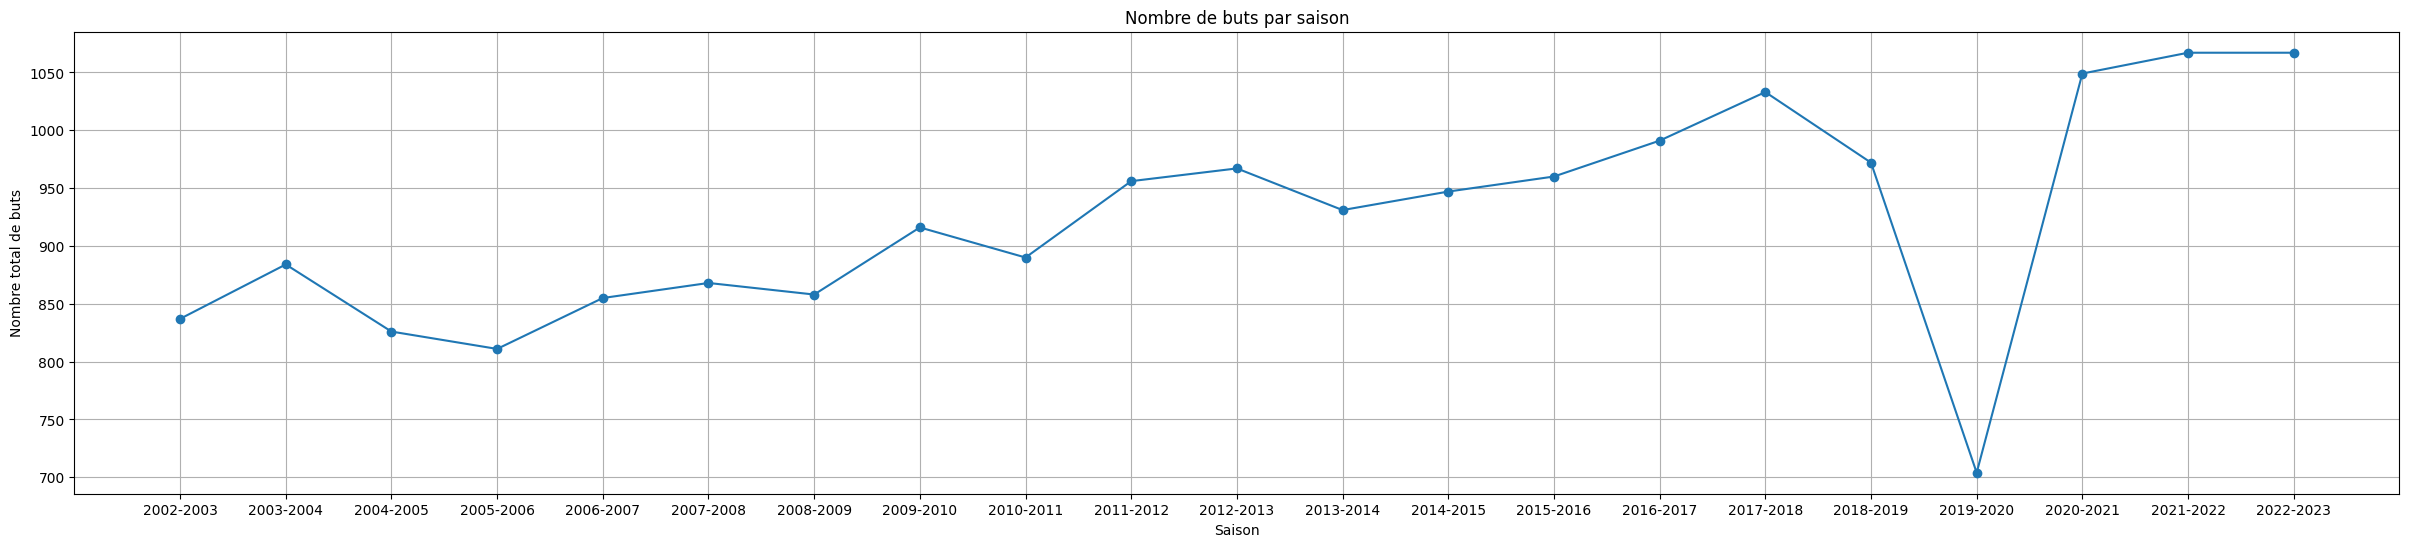

In [15]:
buts_par_saison = dataframe_stats.groupby('Saison')['Buts Equipe 1'].sum().reset_index()

plt.figure(figsize=(30, 6))
plt.plot(buts_par_saison['Saison'], buts_par_saison['Buts Equipe 1'], marker='o', linestyle='-')
plt.title('Nombre de buts par saison')
plt.xlabel('Saison')
plt.ylabel('Nombre total de buts')
plt.grid(True)
plt.show()

*On peut ensuite discriminer en fonction de Domicile/Extérieur et regarder les moyennes au lieu du total*

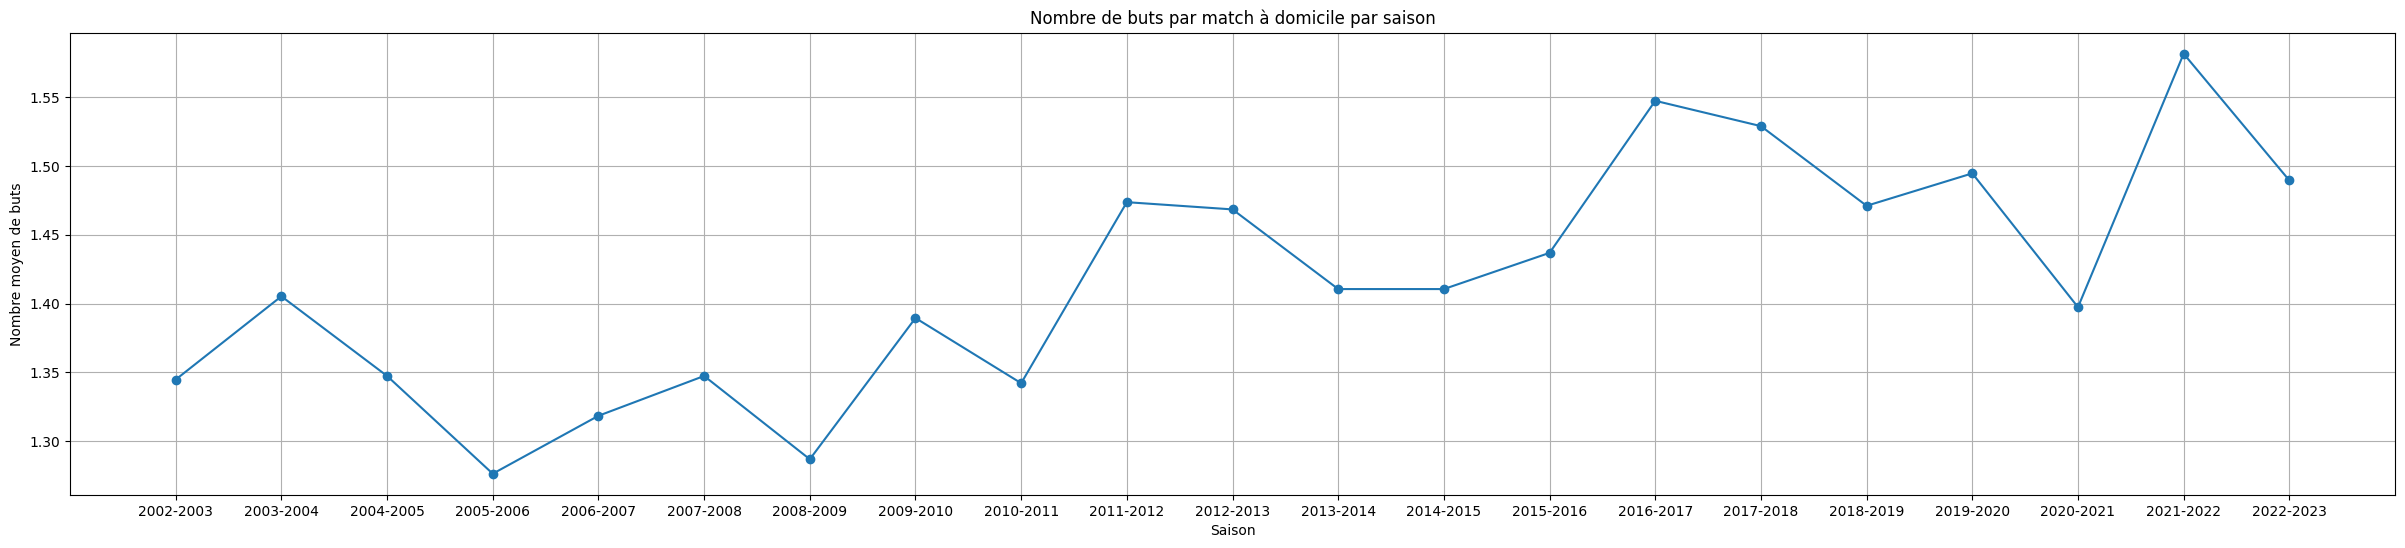

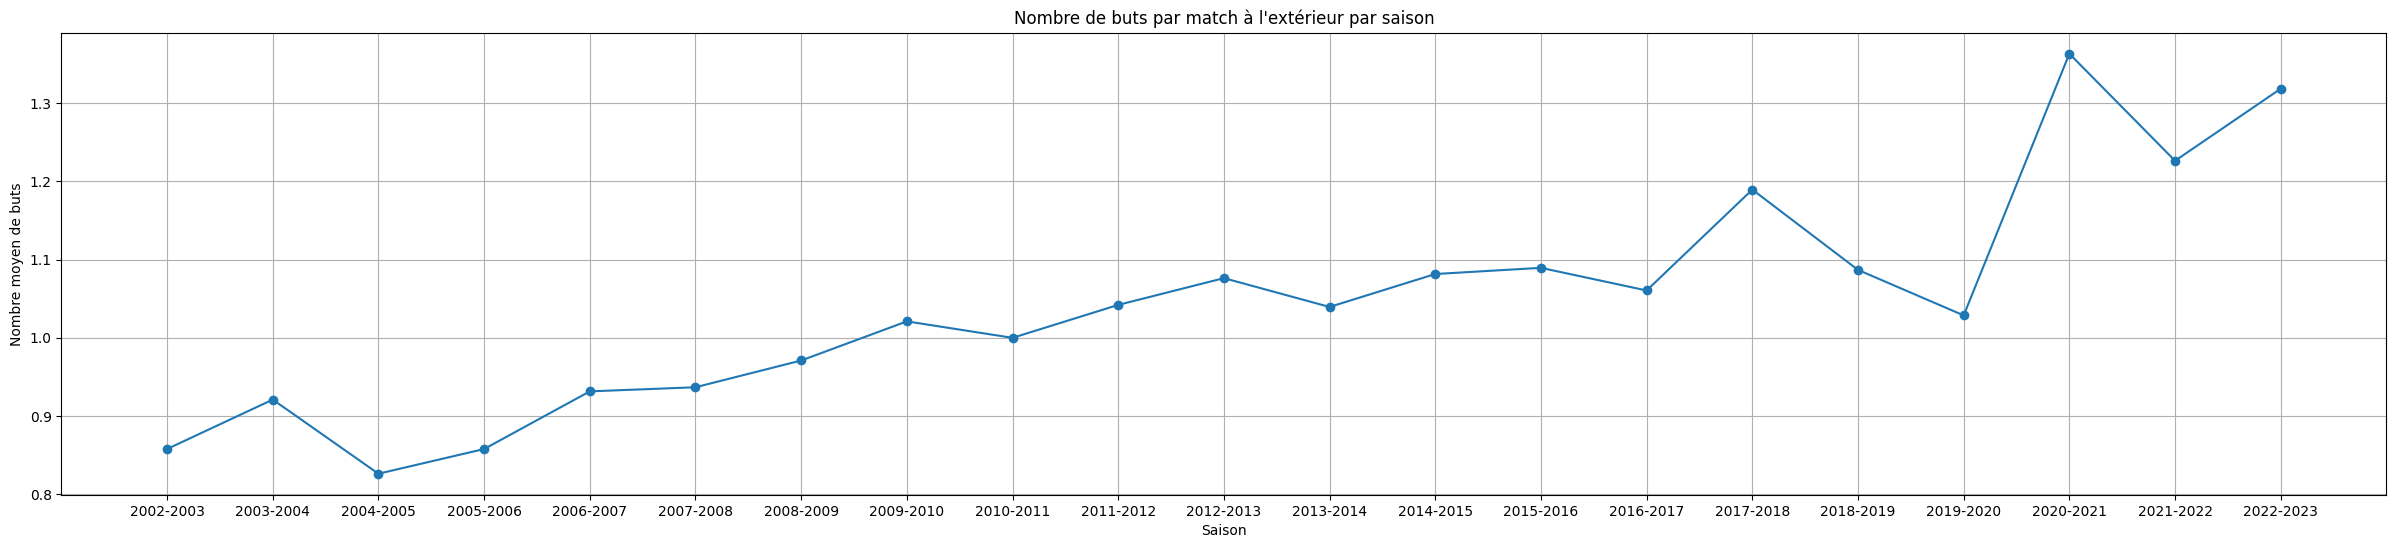

In [16]:
buts_par_saison = dataframe_stats[dataframe_stats['Lieu']=='Domicile'].groupby('Saison')['Buts Equipe 1'].mean().reset_index()

plt.figure(figsize=(30, 6))
plt.plot(buts_par_saison['Saison'], buts_par_saison['Buts Equipe 1'], marker='o', linestyle='-')
plt.title('Nombre de buts par match à domicile par saison')
plt.xlabel('Saison')
plt.ylabel('Nombre moyen de buts')
plt.grid(True)
plt.show()

buts_par_saison = dataframe_stats[dataframe_stats['Lieu']=='Extérieur'].groupby('Saison')['Buts Equipe 1'].mean().reset_index()

plt.figure(figsize=(30, 6))
plt.plot(buts_par_saison['Saison'], buts_par_saison['Buts Equipe 1'], marker='o', linestyle='-')
plt.title('Nombre de buts par match à l\'extérieur par saison')
plt.xlabel('Saison')
plt.ylabel('Nombre moyen de buts')
plt.grid(True)
plt.show()

*Regardons ensuite le nombre de buts par équipe sur la période*

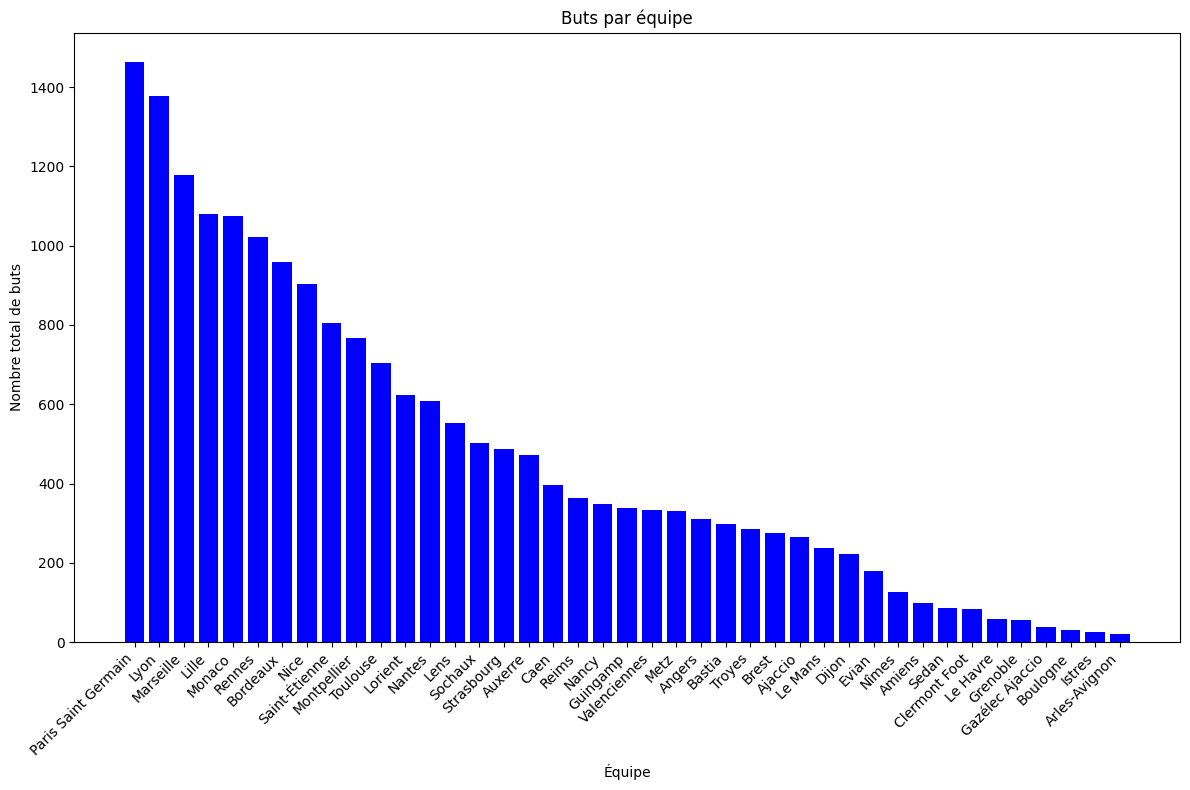

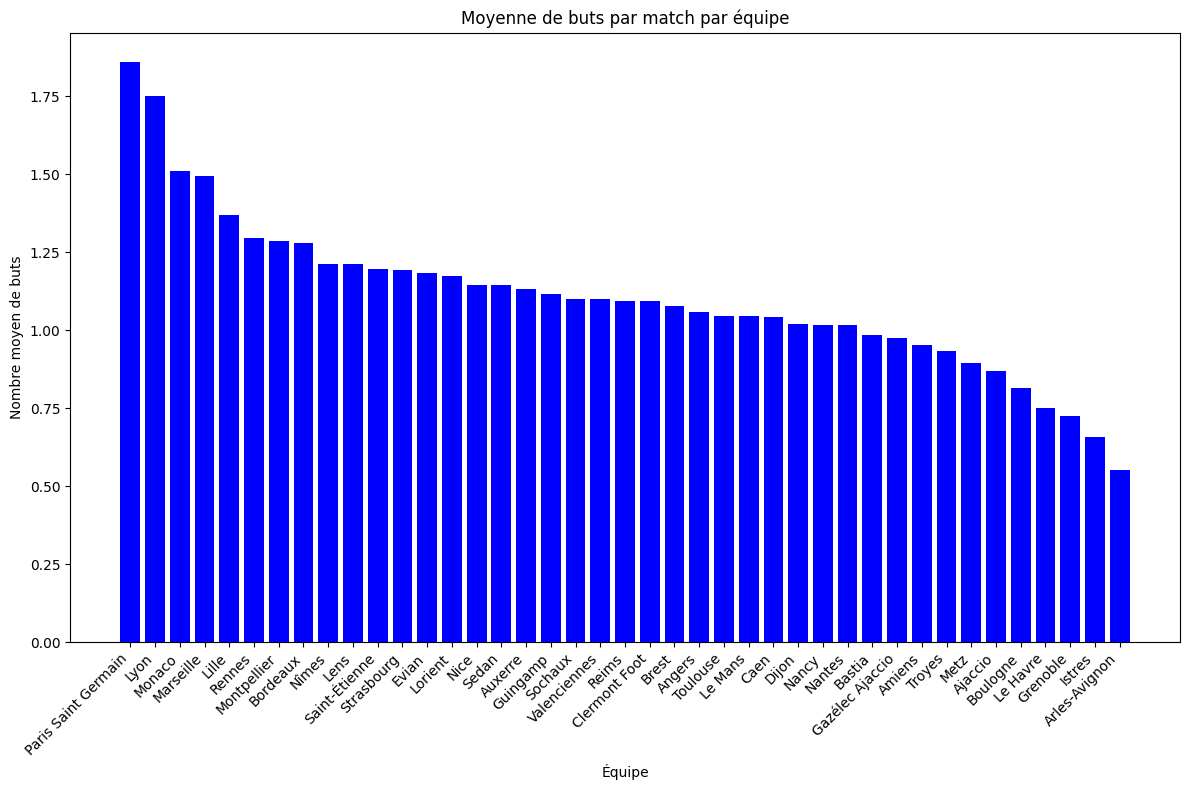

In [17]:
buts_par_equipe = dataframe_stats.groupby('Equipe 1')['Buts Equipe 1'].sum().reset_index()

buts_par_equipe = buts_par_equipe.sort_values(by='Buts Equipe 1', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(buts_par_equipe['Equipe 1'], buts_par_equipe['Buts Equipe 1'], color='blue')
plt.title('Buts par équipe')
plt.xlabel('Équipe')
plt.ylabel('Nombre total de buts')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

buts_par_equipe = dataframe_stats.groupby('Equipe 1')['Buts Equipe 1'].mean().reset_index()

buts_par_equipe = buts_par_equipe.sort_values(by='Buts Equipe 1', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(buts_par_equipe['Equipe 1'], buts_par_equipe['Buts Equipe 1'], color='blue')
plt.title('Moyenne de buts par match par équipe')
plt.xlabel('Équipe')
plt.ylabel('Nombre moyen de buts')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

*On peut aussi regarder le nombre de points sur la période (Victoire = 3, Nul = 1, Défaite = 0)*

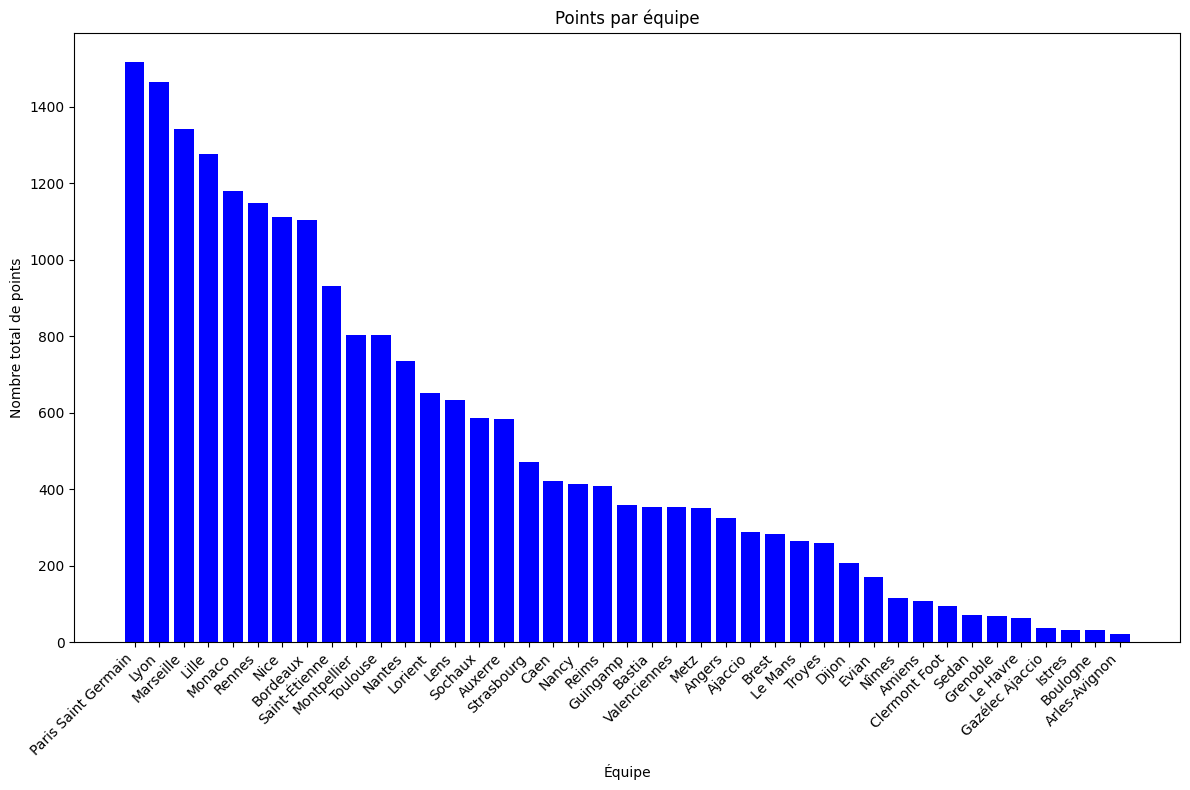

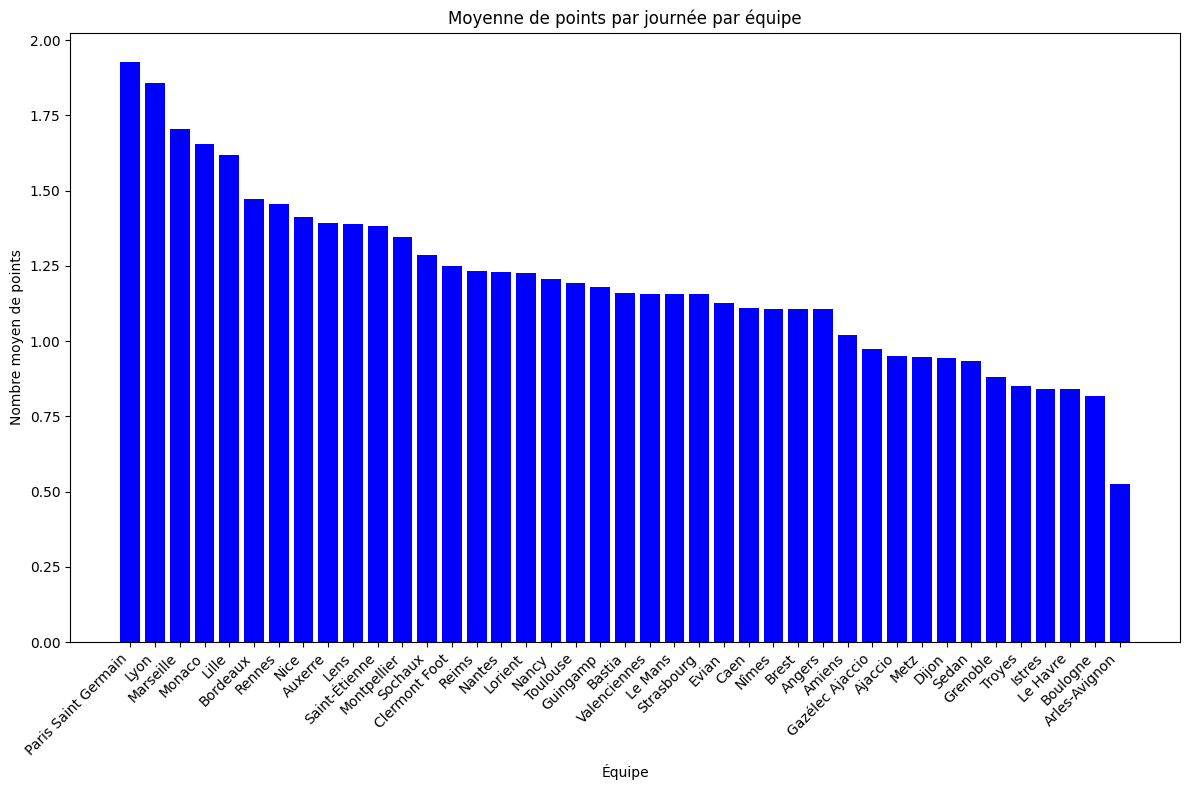

In [18]:
df_plot = dataframe_stats.copy()
df_plot['Résultat'] = df_plot['Résultat'].replace({'Défaite': 0, 'Nul': 1, 'Victoire': 3})

buts_par_equipe = df_plot.groupby('Equipe 1')['Résultat'].sum().reset_index()

buts_par_equipe = buts_par_equipe.sort_values(by='Résultat', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(buts_par_equipe['Equipe 1'], buts_par_equipe['Résultat'], color='blue')
plt.title('Points par équipe')
plt.xlabel('Équipe')
plt.ylabel('Nombre total de points')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

df_plot = dataframe_stats.copy()
df_plot['Résultat'] = df_plot['Résultat'].replace({'Défaite': 0, 'Nul': 1, 'Victoire': 3})

buts_par_equipe = df_plot.groupby('Equipe 1')['Résultat'].mean().reset_index()

buts_par_equipe = buts_par_equipe.sort_values(by='Résultat', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(buts_par_equipe['Equipe 1'], buts_par_equipe['Résultat'], color='blue')
plt.title('Moyenne de points par journée par équipe')
plt.xlabel('Équipe')
plt.ylabel('Nombre moyen de points')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

*Regardons le pourcentage de Victoire à Domicile. Pour l'extérieur il suffit d'inverser Victoire et Défaite*

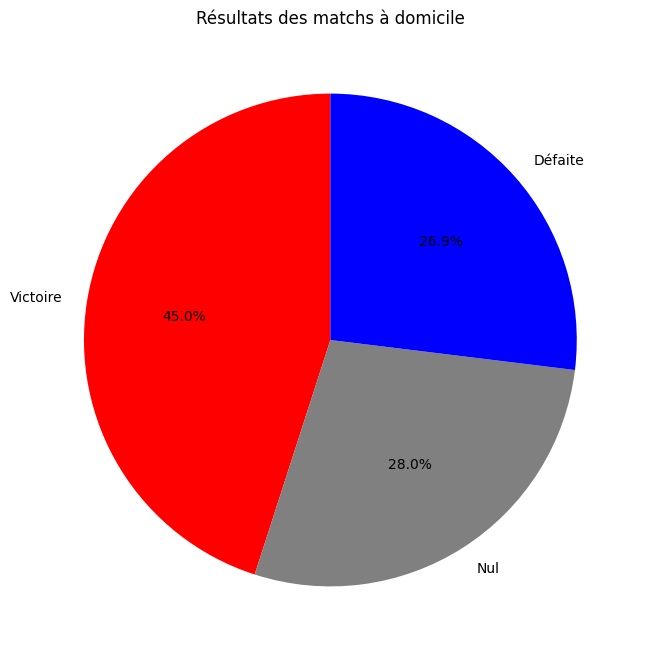

In [19]:
df_plot = dataframe_stats.copy()

result_counts = df_plot[df_plot['Lieu']=='Domicile']['Résultat'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'gray', 'blue'])
plt.title('Résultats des matchs à domicile')
plt.show()

*On peut aussi regarder le pourcentage de Victoire contre des équipes moins bien classées*

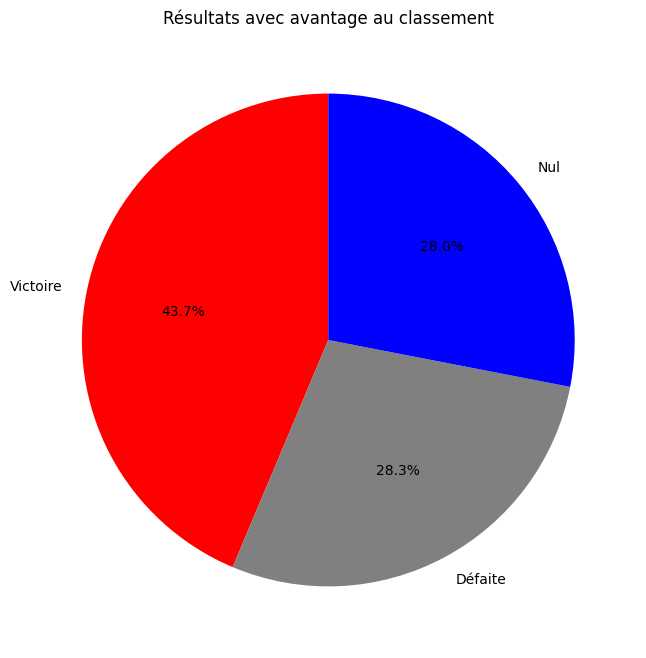

In [20]:
df_plot = dataframe_final.copy()
df_plot['Résultat'] = df_plot['Résultat'].replace({-1: 'Défaite', 0: 'Nul', 1: 'Victoire'})
result_counts = df_plot[df_plot['Classement Equipe 1']<=df_plot['Classement Equipe 2']]['Résultat'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'gray', 'blue'])
plt.title('Résultats avec avantage au classement')
plt.show()

*Analysons maintenant les occurences des scores avec deux méthodes différentes*

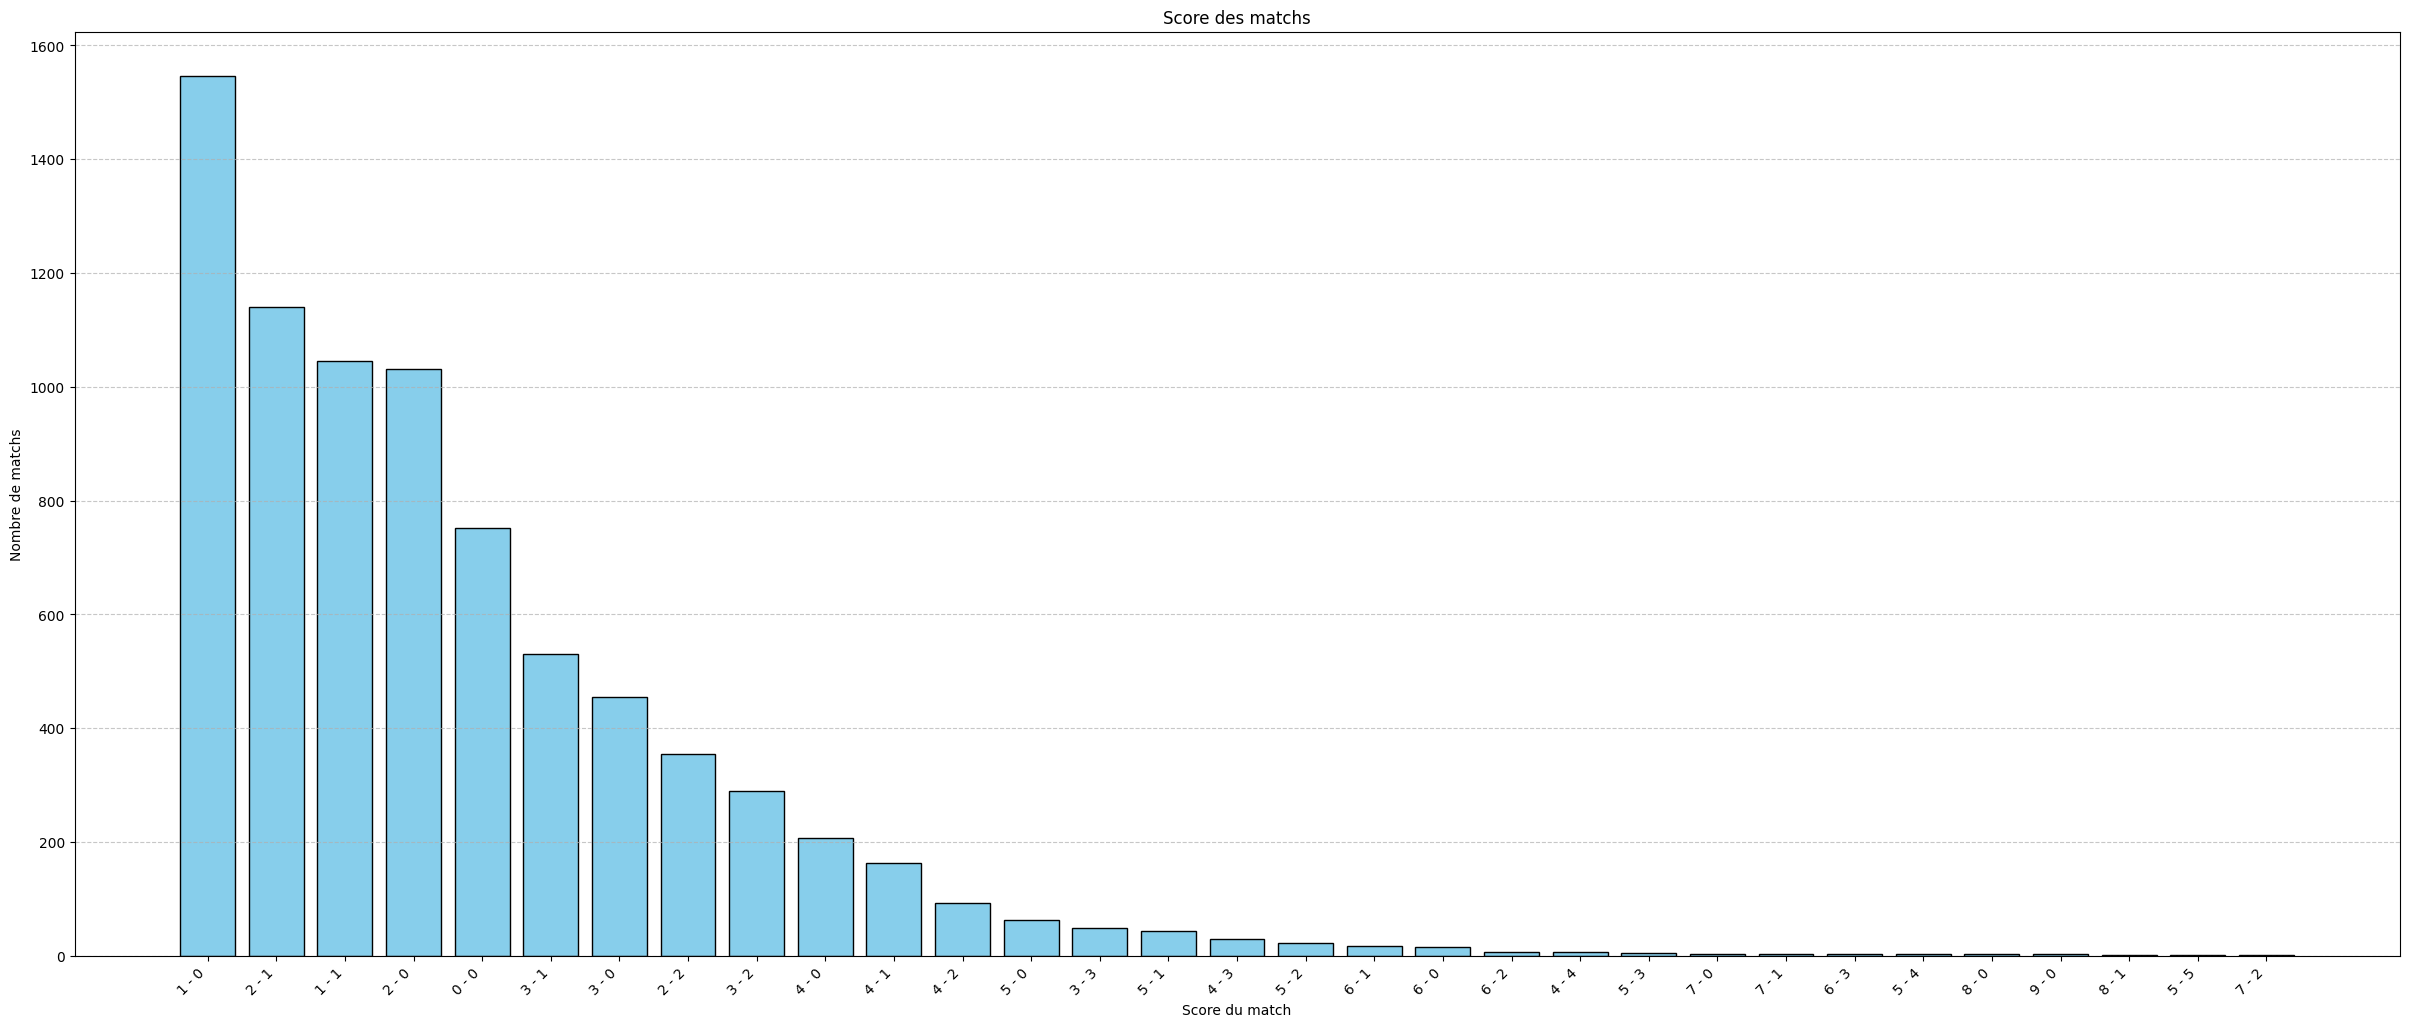

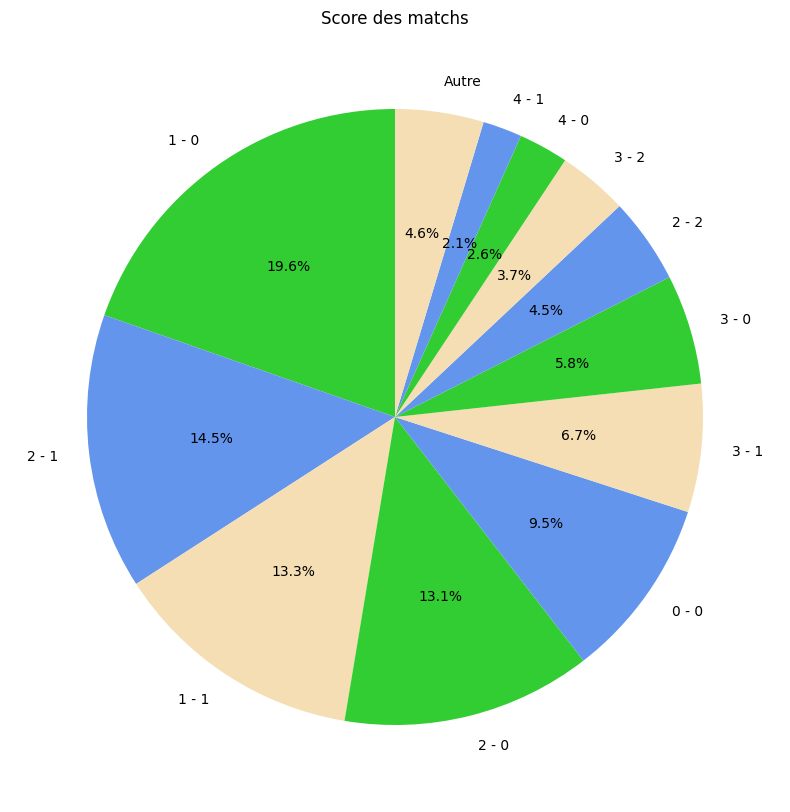

In [21]:
df_plot = dataframe_stats.copy()
df_plot['Score'] = df_plot.apply(lambda row: max(row['Buts Equipe 1'], row['Buts Equipe 2']), axis=1).astype(str) + ' - ' + df_plot.apply(lambda row: min(row['Buts Equipe 1'], row['Buts Equipe 2']), axis=1).astype(str) 
scores_categories = pd.Categorical(df_plot['Score'], categories=df_plot['Score'].unique(), ordered=True)

score_counts = df_plot[df_plot['Lieu'] == 'Domicile']['Score'].value_counts()

plt.figure(figsize=(30, 12))
plt.bar(range(len(score_counts)), score_counts, color='skyblue', edgecolor='black')
plt.title('Score des matchs')
plt.xticks(range(len(score_counts)), score_counts.index, rotation=45, ha='right')
plt.xlabel('Score du match')
plt.ylabel('Nombre de matchs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

result_counts = df_plot[df_plot['Lieu']=='Domicile']['Score'].value_counts()
result_counts_grouped = result_counts.copy()
result_counts_grouped['Autre'] = result_counts[result_counts < 150].sum() 
result_counts_grouped = result_counts_grouped[result_counts_grouped >= 150]

plt.figure(figsize=(10, 10))
plt.pie(result_counts_grouped, labels=result_counts_grouped.index, autopct='%1.1f%%', startangle=90, colors=['limegreen', 'cornflowerblue', 'wheat'])
plt.title('Score des matchs')
plt.show()

*On peut enfin faire un graph en barres du nombre de buts totals par match*

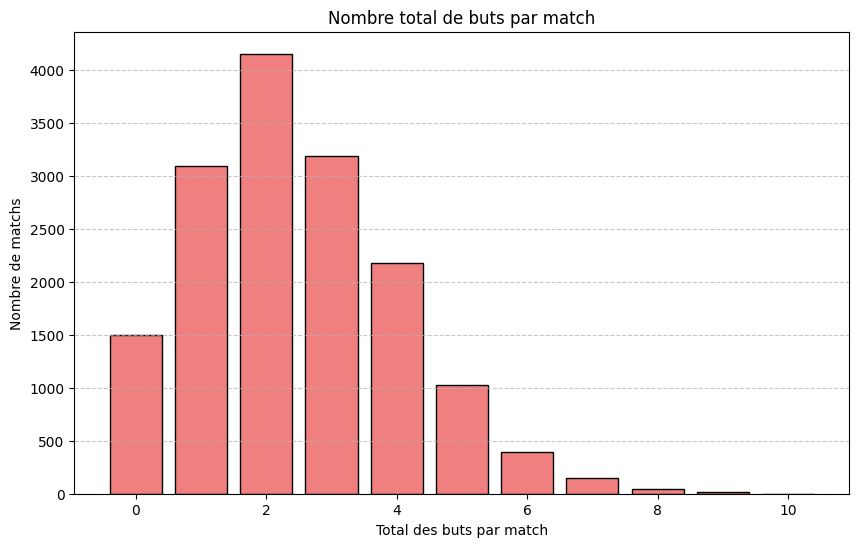

In [22]:
df_plot['Total Buts'] = df_plot['Buts Equipe 1'] + df_plot['Buts Equipe 2']

total_buts_counts = df_plot['Total Buts'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(total_buts_counts.index, total_buts_counts, color='lightcoral', edgecolor='black')

plt.title('Nombre total de buts par match')
plt.xlabel('Total des buts par match')
plt.ylabel('Nombre de matchs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Modélisation

Passons maintenant à la phase modélisation. Nous allons ici tester 3 modèles en modifiant les variables explicatives et même la variable expliquée. Ces modèles sont : **modèle de régression linéaire**, **Random Forest** et **modèle SVM**

Dans un premier temps, applicons ses 3 modèles avec comme variables expliquées le **Résultat** et le **Nombre de buts** de chaque équipe, et le reste des données numériques comme variables explicatives. On transforme le classement en 1/classement pour faciliter la régression et on accorde plus d'importances aux observations au fur et à mesure de la saiosn puisque les variables explicatives sont moins révélatrices en début de saison *(un classement à la 3ème journée est beaucoup moins révélateur qu'à la 37ème)*. 

In [23]:
dataframe_regression = pd.read_csv('dataframe_final.csv', encoding = 'utf-8').dropna()   
dataframe_regression['Classement Equipe 1'] = 1/dataframe_regression['Classement Equipe 1']
dataframe_regression['Classement Equipe 2'] = 1/dataframe_regression['Classement Equipe 2']
X = dataframe_regression.drop(['Equipe 1', 'Equipe 2', 'Saison', 'Journée', 'Buts Equipe 1', 'Buts Equipe 2', 'Résultat'], axis=1)


Y_test, Y_pred, Y_pred2, Y_pred3, Y_pred4 = fonction_appli_modeles(dataframe_regression, X)





                            WLS Regression Results                            
Dep. Variable:               Résultat   R-squared:                       0.125
Model:                            WLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     94.35
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:30:00   Log-Likelihood:                -14563.
No. Observations:               11915   AIC:                         2.916e+04
Df Residuals:                   11896   BIC:                         2.931e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

Random Forest sur le Résultat
Accuracy: 0.4716
Classification Report:
               precision    recall  f1-score   support

          -1       0.48      0.64      0.55      1083
           0       0.25      0.08      0.12       815
           1       0.51      0.60      0.55      1081

    accuracy                           0.47      2979
   macro avg       0.41      0.44      0.41      2979
weighted avg       0.43      0.47      0.43      2979



C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

SVM model sur le Résultat
Accuracy: 0.4861
Classification Report:
               precision    recall  f1-score   support

          -1       0.48      0.69      0.57      1083
           0       0.23      0.01      0.01       815
           1       0.49      0.65      0.56      1081

    accuracy                           0.49      2979
   macro avg       0.40      0.45      0.38      2979
weighted avg       0.42      0.49      0.41      2979



*On remarque déjà que les R-squared de nos régressions sont particulièrement faibles. Nos résultats sont situés entre 47 et 50,15% de bons pronostiques. Le meilleur résultat obtenu est celui de la régression sur le nombres de buts des deux équipes, un modèle qui malheureusement ne permet pas de prédire de match nul. On aurait pu définir un seuil pour lequel on décide de prédire un match nul si la différence est inférieur, mais cela n'améliore pas nos prédictions. Ces résultats sont corrects au vu de l'imprévisibilité d'un domaine comme le football mais on aurait pu s'attendre à avoir un meilleur résultat. On peut donc essayer de faire mieux*

On peut faire une tentative de pondération des modèles pour en sortir une prédiction plus précise. On teste donc différents poids associés aux modèles.

In [24]:
n=0
for poids_modele1 in np.arange(0, 2, 0.2):
    for poids_modele2 in np.arange(0, 2, 0.2):
        for poids_modele3 in np.arange(0, 2, 0.2):
            for poids_modele4 in np.arange(0, 2, 0.2):  
                for k in np.arange(0,2,0.2):
                    Y_pred = np.array(Y_pred)
                    Y_pred2 = np.array(Y_pred2)
                    Y_pred3 = np.array(Y_pred3)
                    Y_pred4 = np.array(Y_pred4)

                    resultat_final_pondere = (
                        poids_modele1 * Y_pred +
                        poids_modele2 * Y_pred2 +
                        poids_modele3 * Y_pred3 +
                        poids_modele4 * Y_pred4
                    )
                    resultat_final = [1 if x > k else -1 if x < -k else 0 for x in resultat_final_pondere]

                    bon_résultat = [a == b for a, b in zip(resultat_final, Y_test)]

                    accuracy = (sum(bon_résultat) / len(bon_résultat)) 
                    if accuracy > n:
                        n= accuracy 
                        a = poids_modele1
                        b = poids_modele2
                        c = poids_modele3
                        d = poids_modele4
                        e = k
print('poids_modele1: ', a)
print('poids_modele2: ', b)
print('poids_modele3: ', c)
print('poids_modele4: ', d)
print('k: ', e)
print('accuracy: ', n)


poids_modele1:  0.0
poids_modele2:  0.2
poids_modele3:  0.0
poids_modele4:  0.0
k:  0.0
accuracy:  0.5015105740181269


*L'amélioration n'est pas significative voire absente selon les ensembles d'entrainement et de test choisis. Tentons de changer nos modèles.*

Ensuite on entraine de nouveaux nos modèles mais on modifie les variables explicatives. On ajoute les colonnes 'BM Equipe 1 à D si D', 'BM Equipe 1 à E si E', 'BE Equipe 1 à D si D', 'BE Equipe 1 à E si E', 'BM Equipe 2 à D si D', 'BM Equipe 2 à E si E', 'BE Equipe 2 à D si D' et 'BE Equipe 2 à E si E', dont la valeur reprend celle des colonnes déjà existantes mais vaut 0 si le lieu ne correspond pas au match en question 

In [25]:
dataframe_regression = pd.read_csv('dataframe_final.csv', encoding = 'utf-8').dropna()

dataframe_regression[['BM Equipe 1 à D si D', 'BM Equipe 1 à E si E', 'BE Equipe 1 à D si D', 'BE Equipe 1 à E si E', 'BM Equipe 2 à D si D',
                      'BM Equipe 2 à E si E', 'BE Equipe 2 à D si D', 'BE Equipe 2 à E si E']] = dataframe_regression.apply(
        lambda row: [row['Equipe 1 à Domicile'] * row['Moyenne_BM par 1 à Domicile'], (1 - row['Equipe 1 à Domicile']) * row['Moyenne_BM par 1 à Extérieur'], 
                     row['Equipe 1 à Domicile'] * row['Moyenne_BE par 1 à Domicile'], (1 - row['Equipe 1 à Domicile']) * row['Moyenne_BE par 1 à Extérieur'],
                     (1-row['Equipe 1 à Domicile']) * row['Moyenne_BM par 2 à Domicile'], (row['Equipe 1 à Domicile']) * row['Moyenne_BM par 2 à Extérieur'], 
                     (1-row['Equipe 1 à Domicile']) * row['Moyenne_BE par 1 à Domicile'], (row['Equipe 1 à Domicile']) * row['Moyenne_BE par 1 à Extérieur']], axis=1, result_type='expand')
X = dataframe_regression.drop(['Equipe 1', 'Equipe 2', 'Saison', 'Journée', 'Buts Equipe 1', 'Buts Equipe 2', 'Résultat'], axis=1)


fonction_appli_modeles(dataframe_regression, X);




                            WLS Regression Results                            
Dep. Variable:               Résultat   R-squared:                       0.125
Model:                            WLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     70.49
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          3.12e-320
Time:                        10:33:15   Log-Likelihood:                -14566.
No. Observations:               11915   AIC:                         2.918e+04
Df Residuals:                   11890   BIC:                         2.937e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

Random Forest sur le Résultat
Accuracy: 0.4750
Classification Report:
               precision    recall  f1-score   support

          -1       0.49      0.64      0.56      1083
           0       0.25      0.08      0.12       815
           1       0.50      0.60      0.55      1081

    accuracy                           0.47      2979
   macro avg       0.42      0.44      0.41      2979
weighted avg       0.43      0.47      0.43      2979



C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

SVM model sur le Résultat
Accuracy: 0.4656
Classification Report:
               precision    recall  f1-score   support

          -1       0.47      0.62      0.54      1083
           0       0.28      0.09      0.14       815
           1       0.49      0.59      0.54      1081

    accuracy                           0.47      2979
   macro avg       0.42      0.44      0.41      2979
weighted avg       0.43      0.47      0.43      2979



*Nos résultats ne sont pas meilleurs que précédemment. On décide donc ne pas essayer de pondérer les modèles dans ce cas là.*

Enfin on essaie un dernier changement de variables explicatives en supprimant les colonnes 'Moyenne_BM par 1 à Domicile', 'Moyenne_BM par 1 à Extérieur','Moyenne_BE par 1 à Domicile','Moyenne_BE par 1 à Extérieur','Moyenne_BM par 2 à Domicile','Moyenne_BM par 2 à Extérieur','Moyenne_BE par 1 à Domicile' et 'Moyenne_BE par 1 à Extérieur', qui sont inutiles maintenant et pourrait créer des perturbations dans nos modèles.

In [26]:
dataframe_regression = pd.read_csv('dataframe_final.csv', encoding = 'utf-8').dropna()
dataframe_regression[['BM Equipe 1 à D si D', 'BM Equipe 1 à E si E', 'BE Equipe 1 à D si D', 'BE Equipe 1 à E si E', 'BM Equipe 2 à D si D',
                      'BM Equipe 2 à E si E', 'BE Equipe 2 à D si D', 'BE Equipe 2 à E si E']] = dataframe_regression.apply(
        lambda row: [row['Equipe 1 à Domicile'] * row['Moyenne_BM par 1 à Domicile'], (1 - row['Equipe 1 à Domicile']) * row['Moyenne_BM par 1 à Extérieur'], 
                     row['Equipe 1 à Domicile'] * row['Moyenne_BE par 1 à Domicile'], (1 - row['Equipe 1 à Domicile']) * row['Moyenne_BE par 1 à Extérieur'],
                     (1-row['Equipe 1 à Domicile']) * row['Moyenne_BM par 2 à Domicile'], (row['Equipe 1 à Domicile']) * row['Moyenne_BM par 2 à Extérieur'], 
                     (1-row['Equipe 1 à Domicile']) * row['Moyenne_BE par 1 à Domicile'], (row['Equipe 1 à Domicile']) * row['Moyenne_BE par 1 à Extérieur']], axis=1, result_type='expand')
X = dataframe_regression.drop(['Equipe 1', 'Equipe 2', 'Saison', 'Journée', 'Buts Equipe 1', 'Buts Equipe 2', 'Résultat','Moyenne_BM par 1 à Domicile',
                                     'Moyenne_BM par 1 à Extérieur','Moyenne_BE par 1 à Domicile','Moyenne_BE par 1 à Extérieur','Moyenne_BM par 2 à Domicile',
                                     'Moyenne_BM par 2 à Extérieur','Moyenne_BE par 1 à Domicile','Moyenne_BE par 1 à Extérieur'], axis = 1)


fonction_appli_modeles(dataframe_regression, X);



                            WLS Regression Results                            
Dep. Variable:               Résultat   R-squared:                       0.124
Model:                            WLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     83.84
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          4.15e-321
Time:                        10:34:56   Log-Likelihood:                -14573.
No. Observations:               11915   AIC:                         2.919e+04
Df Residuals:                   11894   BIC:                         2.934e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

Random Forest sur le Résultat
Accuracy: 0.4783
Classification Report:
               precision    recall  f1-score   support

          -1       0.49      0.65      0.56      1083
           0       0.27      0.07      0.12       815
           1       0.51      0.61      0.55      1081

    accuracy                           0.48      2979
   macro avg       0.42      0.45      0.41      2979
weighted avg       0.43      0.48      0.43      2979



C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

SVM model sur le Résultat
Accuracy: 0.4673
Classification Report:
               precision    recall  f1-score   support

          -1       0.47      0.64      0.54      1083
           0       0.28      0.07      0.11       815
           1       0.49      0.60      0.54      1081

    accuracy                           0.47      2979
   macro avg       0.41      0.43      0.40      2979
weighted avg       0.43      0.47      0.42      2979



*Les résultats ne sont pas meilleures et donc nos modèles les plus performants étaient les premiers.*

Les scores de prédictions étant assez faible et la base assez limitée en terme de variables pour décrire le déroulement des matches, on décide d'adapter une nouvelle approche avec moins d'observations mais beaucoup plus de variables.

# Deuxième approche 

Dans cette deuxième partie, nous allons récupérer une base de données statistiques plus conséquente sur les matchs de Ligue 1. Cette base est obtenue sur le même site que précédemment: fbref.com. Elle se met à jour automatiquement grâce à un script Python quotidien, et sera la base que nous utiliserons pour présenter nos résultats, comme vous le verrez. Dans ce rendu nous allons nous focaliser sur la compréhension globale de la construction de cette base, avec l'utilisation des différentes fonctions, et sur l'utilisation de l'interface personnalisé.

Importons dans un premier temps l'ensemble des fonctions nécéssaires à l'utilisation de la base de donnée.

In [1]:
from fonctions_preprocess import *
from scrapping import *
pd.set_option('display.max_columns', None)



Notre processus de scrapping nous permet de récupérer une base brute à partir de fbref.com. Pour l'utiliser, il suffit d'exécuter la fonction "scrape_ligue1_data(nb_saisons= ...)" et d'indiquer en paramètre le nombre de saisons que l'on souhaite scrapper. Nous nous limiterons ici à 6 saisons, car au-delà, il n'y a plus autant de statistiques disponibles pour les matchs scrappés.

Pour scrapper les données nous pouvons utiliser la fonction ci-dessous:

In [28]:
#soccer_data = scrape_ligue1_data(nb_saisons=6)

Nous allons débuter en analysant la base de données brute en examinant les résultats de notre processus de scrapping. Nous préférons importer les données car le scrapping est assez chronophage, prenant environ 30 minutes pour 6 saisons.

In [2]:
soccer_data = pd.read_csv('dynamic_soccer_database.csv', index_col=0)
soccer_data.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss_x,Attendance,Captain,Formation,Referee,Match Report,Notes,Team,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_G/Sh,Standard_G/SoT,Standard_Dist,Standard_FK,Standard_PK,Standard_PKatt,Expected_xG,Expected_npxG,Expected_npxG/Sh,Expected_G-xG,Expected_np:G-xG,Poss_y,Touches_Touches,Touches_Def Pen,Touches_Def 3rd,Touches_Mid 3rd,Touches_Att 3rd,Touches_Att Pen,Touches_Live,Take-Ons_Att,Take-Ons_Succ,Take-Ons_Succ%,Take-Ons_Tkld,Take-Ons_Tkld%,Carries_Carries,Carries_TotDist,Carries_PrgDist,Carries_PrgC,Carries_1/3,Carries_CPA,Carries_Mis,Carries_Dis,Receiving_Rec,Receiving_PrgR,Tackles_Tkl,Tackles_TklW,Tackles_Def 3rd,Tackles_Mid 3rd,Tackles_Att 3rd,Challenges_Tkl,Challenges_Att,Challenges_Tkl%,Challenges_Lost,Blocks_Blocks,Blocks_Sh,Blocks_Pass,Int,Tkl+Int,Clr,Err,Total_Cmp,Total_Att,Total_Cmp%,Total_TotDist,Total_PrgDist,Short_Cmp,Short_Att,Short_Cmp%,Medium_Cmp,Medium_Att,Medium_Cmp%,Long_Cmp,Long_Att,Long_Cmp%,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP,Performance_SoTA,Performance_GA,Performance_Saves,Performance_Save%,Performance_CS,Performance_PSxG,Performance_PSxG+/-,Penalty Kicks_PKatt,Penalty Kicks_PKA,Penalty Kicks_PKsv,Penalty Kicks_PKm,Launched_Cmp,Launched_Att,Launched_Cmp%,Passes_Att (GK),Passes_Thr,Passes_Launch%,Passes_AvgLen,Goal Kicks_Att,Goal Kicks_Launch%,Goal Kicks_AvgLen,Crosses_Opp,Crosses_Stp,Crosses_Stp%,Sweeper_#OPA,Sweeper_AvgDist
0,2018-07-26,17:45,Europa Lg,Second qualifying round,Thu,Away,W,1,0,lv FK Ventspils,NaN,NaN,NaN,3055.0,Benoît Costil,5-3-2,Sergey Lapochkin,Match Report,Leg 1 of 2,Bordeaux,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-08-02,20:45,Europa Lg,Second qualifying round,Thu,Home,W,2,1,lv FK Ventspils,NaN,NaN,NaN,15863.0,Benoît Costil,4-3-3,Hugo Miguel,Match Report,Leg 2 of 2; Bordeaux won,Bordeaux,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-08-04,20:00,Trophée des Champions,Trophée des Champions,Sat,Neutral,L,0,4,Paris S-G,NaN,NaN,27.0,41237.0,Andrea Raggi,4-3-3,Ruddy Buquet,Match Report,NaN,Monaco,0,8.0,2.0,25.0,0.00,0.00,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,4.0,3.0,42.9,0.0,NaN,NaN,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-08-04,20:00,Trophée des Champions,Trophée des Champions,Sat,Neutral,W,4,0,Monaco,NaN,NaN,73.0,41237.0,Thiago Silva,4-3-3,Ruddy Buquet,Match Report,NaN,Paris Saint Germain,4,14.0,7.0,50.0,0.29,0.57,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,100.0,1.0,NaN,NaN,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-08-09,20:00,Europa Lg,Third qualifying round,Thu,Away,W,3,1,ua FC Mariupol,NaN,NaN,NaN,6587.0,Benoît Costil,4-3-3,Ivan Bebek,Match Report,Leg 1 of 2,Bordeaux,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Nous allons maintenant essayer de mettre en œuvre la base de données. Dans un premier temps, nous allons renommer les colonnes avec des noms plus explicites, puis nous allons supprimer certaines colonnes que nous jugeons peu utiles, telles que la distance des passes du gardien.

Un rapide .describe() nous permet d'observer quelques statistiques pertinentes sur nos bases de données. Par exemple, en moyenne, une équipe tire 12 fois par match, et le maximum de tirs sur un match est de 38 au moment de notre analyse (27/12/2023).

In [3]:
soccer_data = renommer_colonnes(soccer_data)
soccer_data.describe()


,xG,xGA,Poss_x,Attendance,Total Shots,Shots on Target,Shots on Target %,Goals per Shot,Goals per Shot on Target,Average Shot Distance,Free Kicks Taken,Penalty Kicks Scored,Expected Goals,Non-Penalty Expected Goals,Non-Penalty Expected Goals per Shot,Goal Difference vs Expected Goals,Non-Penalty Goal Difference vs Expected Goals,Poss_y,Total Touches,Touches in Defensive Penalty Area,Touches in Defensive Third,Touches in Midfield Third,Touches in Attacking Third,Touches in Attacking Penalty Area,Dribbles Attempted,Successful Dribbles,Successful Dribble %,Dribbles Tackled,Dribble Tackle %,Total Carries,Total Carry Distance,Progressive Carry Distance,Progressive Carries,Carries into Final Third,Carries into Penalty Area,Carries Miscontrolled,Carries Dispossessed,Tackles,Tackles Won,Tackles in Defensive Third,Tackles in Midfield Third,Tackles in Attacking Third,Dribblers Tackled,Total Dribbles Against,Defensive Dribblers Win %,Defensive Challenges Lost,Total Blocks,Shot Blocks,Pass Blocks,Interceptions,Tackles Plus Interceptions,Clearances,Errors Leading to Goal,Passes Completed,Passes Attempted,Pass Completion %,Total Pass Distance,Progressive Pass Distance,Short Passes Completed,Short Passes Attempted,Short Pass Completion %,Medium Passes Completed,Medium Passes Attempted,Medium Pass Completion %,Long Passes Completed,Long Passes Attempted,Long Pass Completion %,Assists,Expected Assists Goals,Expected Assists,Key Passes,Passes into Final Third,Passes into Penalty Area,Crosses into Penalty Area,Progressive Passes,Shots on Target Against,Keeper Saves,Keeper Save Percentage,Clean Sheets,Penalty Kicks Against,Penalty Kicks Against Saved,Penalty Kicks Against Missed
count,4164.000000,4164.000000,4427.000000,3656.000000,4491.000000,4491.000000,4465.000000,4465.000000,4336.000000,4163.000000,4164.000000,4555.000000,4164.000000,4164.000000,4162.000000,4164.000000,4164.000000,4427.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4491.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4491.000000,4555.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4553.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4491.000000,4491.000000,4311.000000,4550.000000,4555.000000,4554.000000,4554.000000
mean,1.340874,1.326777,50.403659,22974.490153,12.003785,4.083500,34.603113,0.109406,0.295918,18.442277,0.524736,0.147091,1.340874,1.199592,0.102150,-0.030115,-0.033405,50.403659,612.134726,57.947887,187.685879,294.829491,136.079251,19.139529,18.211816,9.693324,53.163064,7.960615,43.999976,377.941883,2072.098703,1039.060999,18.256004,14.315082,4.159222,16.123439,9.493756,17.329971,10.272100,8.268492,6.964217,2.097262,7.858309,17.382325,45.493684,9.524015,10.121278,2.882325,7.238953,10.902472,25.915477,17.981748,0.321326,401.605908,501.665466,78.949784,7135.310519,2582.046830,178.429635,203.223583,86.934030,166.744957,193.926513,84.870605,43.321085,75.991354,56.761407,0.905996,0.933069,0.890154,8.962776,30.278818,7.060759,1.908021,39.619116,4.109998,2.802271,70.343122,0.279121,0.141164,0.026350,0.009003
std,0.776610,0.771758,10.579841,15605.170456,5.046663,2.399967,16.877885,0.126673,0.272288,3.291863,0.739154,0.381111,0.776610,0.701696,0.046741,0.963577,0.952411,10.579841,112.617056,16.359137,38.415629,80.619462,50.662396,8.626473,6.277114,4.216156,14.155097,3.485378,13.404847,117.921547,639.390087,336.355183,6.781570,6.346368,2.602842,4.641367,3.861300,5.152365,3.832097,3.741780,3.102527,1.683996,3.468828,6.042235,13.963476,4.163619,3.755363,2.014739,3.067706,4.325026,10.364148,8.369681,0.584051,118.52

### Prétraitement de la Base de Données

1. **Transformation de la Date et de l'Heure du Match :**
   - Nous commençons par regrouper la date et l'heure du match en une seule variable pour une meilleure gestion du temps.

2. **Création de la Variable "Saison" :**
   - Nous ajoutons une nouvelle variable appelée "Saison" qui indique la saison pendant laquelle chaque match a eu lieu.

3. **Mapping des Équipes :**
   - En raison des différences de noms entre les colonnes "Opponent" et "Team", nécessitant la gestion de trois équipes distinctes, nous effectuons un mappage approprié pour uniformiser les noms d'équipes.

4. **Filtrage des Matchs de Ligue 1 :**
   - Nous conservons uniquement les matchs de la Ligue 1 en utilisant la colonne "Comp", éliminant ainsi les matchs d'autres compétitions.

5. **Extraction de la Journée du Match :**
   - Nous extrayons le numéro de la journée du match à partir de la colonne "Matchweek", simplifiant ainsi la représentation de la journée.

6. **Nettoyage de la Colonne 'Formation' :**
   - Pour uniformiser les données, nous nettoyons la colonne 'Formation' en remplaçant le caractère '◆' par une chaîne vide dans les lignes qui contiennent ce caractère supplémentaire.

7. **Renommage des Colonnes "Poss_x" et Suppression de "Poss_y" :**
   - Nous renommons la colonne "Poss_x" en "Poss" pour plus de clarté. Si la colonne "Poss_y" existe, nous la supprimons car elle est due au scrapping.

8. **Création de la Variable "MatchID" :**
   - Nous créons une nouvelle variable "MatchID" en combinant les colonnes "Team" et "Opponent" pour identifier de manière unique chaque match.


In [4]:
mapping_equipe = {
    'Nimes': 'Nîmes',
    'Paris S-G': 'Paris Saint Germain',
    'Saint Etienne': 'Saint-Étienne'
    }

soccer_data = preprocess_initial(soccer_data, mapping_equipe)
soccer_data.head()

,DateTime,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team,Total Shots,Shots on Target,Shots on Target %,Goals per Shot,Goals per Shot on Target,Average Shot Distance,Free Kicks Taken,Penalty Kicks Scored,Expected Goals,Non-Penalty Expected Goals,Non-Penalty Expected Goals per Shot,Goal Difference vs Expected Goals,Non-Penalty Goal Difference vs Expected Goals,Total Touches,Touches in Defensive Penalty Area,Touches in Defensive Third,Touches in Midfield Third,Touches in Attacking Third,Touches in Attacking Penalty Area,Dribbles Attempted,Successful Dribbles,Successful Dribble %,Dribbles Tackled,Dribble Tackle %,Total Carries,Total Carry Distance,Progressive Carry Distance,Progressive Carries,Carries into Final Third,Carries into Penalty Area,Carries Miscontrolled,Carries Dispossessed,Tackles,Tackles Won,Tackles in Defensive Third,Tackles in Midfield Third,Tackles in Attacking Third,Dribblers Tackled,Total Dribbles Against,Defensive Dribblers Win %,Defensive Challenges Lost,Total Blocks,Shot Blocks,Pass Blocks,Interceptions,Tackles Plus Interceptions,Clearances,Errors Leading to Goal,Passes Completed,Passes Attempted,Pass Completion %,Total Pass Distance,Progressive Pass Distance,Short Passes Completed,Short Passes Attempted,Short Pass Completion %,Medium Passes Completed,Medium Passes Attempted,Medium Pass Completion %,Long Passes Completed,Long Passes Attempted,Long Pass Completion %,Assists,Expected Assists Goals,Expected Assists,Key Passes,Passes into Final Third,Passes into Penalty Area,Crosses into Penalty Area,Progressive Passes,Shots on Target Against,Keeper Saves,Keeper Save Percentage,Clean Sheets,Penalty Kicks Against,Penalty Kicks Against Saved,Penalty Kicks Against Missed,Saison,MatchID
5,2018-08-10 20:45:00,Ligue 1,1,Fri,Home,W,4,0,Toulouse,3.2,0.3,60.0,60756.0,Dimitri Payet,4-2-3-1,Ruddy Buquet,Match Report,NaN,Marseille,22.0,9.0,40.9,0.14,0.33,18.6,2.0,1,3.2,2.5,0.11,0.8,0.5,660.0,45.0,205.0,313.0,153.0,30.0,13.0,6.0,46.2,7.0,53.8,438.0,2287.0,1333.0,31.0,26.0,8.0,15.0,12.0,29.0,20.0,11.0,11.0,7.0,15.0,26.0,57.7,11.0,8.0,0.0,8.0,7.0,36,14.0,0.0,448.0,542.0,82.7,7324.0,2540.0,210.0,232.0,90.5,147.0,167.0,88.0,54.0,87.0,62.1,2.0,1.7,0.9,14.0,18.0,6.0,3.0,29.0,1.0,1.0,100.0,1.0,0,0.0,0.0,2018-2019,Marseille_Toulouse
6,2018-08-10 20:45:00,Ligue 1,1,Fri,Away,L,0,4,Marseille,0.3,3.2,40.0,60756.0,Max Gradel,4-2-3-1,Ruddy Buquet,Match Report,NaN,Toulouse,5.0,1.0,20.0,0.00,0.00,20.3,0.0,0,0.3,0.3,0.06,-0.3,-0.3,496.0,71.0,182.0,225.0,93.0,11.0,26.0,11.0,42.3,15.0,57.7,303.0,1727.0,887.0,17.0,13.0,2.0,27.0,14.0,19.0,12.0,13.0,3.0,3.0,7.0,13.0,53.8,6.0,8.0,3.0,5.0,15.0,34,22.0,1.0,281.0,360.0,78.1,5171.0,2262.0,112.0,130.0,86.2,131.0,156.0,84.0,31.0,56.0,55.4,0.0,0.2,0.6,3.0,16.0,4.0,2.0,32.0,10.0,6.0,70.0,0.0,1,0.0,0.0,2018-2019,Toulouse_Marseille
7,2018-08-11 20:00:00,Ligue 1,1,Sat,Home,L,3,4,Nîmes,2.8,1.5,57.0,9534.0,Ismaël Traoré,4-2-3-1,Antony Gautier,Match Report,NaN,Angers,20.0,7.0,35.0,0.15,0.43,17.6,1.0,0,2.8,2.8,0.14,0.2,0.2,617.0,32.0,136.0,354.0,134.0,24.0,22.0,13.0,59.1,9.0,40.9,294.0,1442.0,723.0,13.0,16.0,4.0,14.0,12.0,19.0,15.0,5.0,12.0,2.0,10.0,18.0,55.6,8.0,11.0,4.0,7.0,3.0,22,16.0,1.0,381.0,506.0,75.3,6423.0,2503.0,179.0,207.0,86.5,151.0,186.0,81.2,37.0,79.0,46.8,2.0,2.0,1.4,12.0,25.0,6.0,0.0,44.0,4.0,1.0,0.0,0.0,0,0.0,0.0,2018-2019,Angers_Nîmes
8,2018-08-11 20:00:00,Ligue 1,1,Sat,Away,W,2,1,Montpellier,2.0,1.3,46.0,12765.0,Júlio Tavares,3-4-3,Florent Batta,Match Report,NaN,Dijon,9.0,3.0,33.3,0.22,0.67,17.2,1.0,0,2.0,1.3,0.14,0.0,0.7,522.0,67.0,182.0,265.0,80.0,14.0,14.0,9.0,64.3,5.0,35.7,302.0,1789.0,868.0,17.0,13.0,5.0,14.0,10.0,16.0,10.0,8.0,8.0,0.0,0.0,10.0,0.0,10.0,9.0,2.0,7.0,12.0,28,29.0,0.0,323.0,423.0,76.4,6289.0,2948.0,135.0,158.0,85.4,126.0,150.0,84.0,52.0,95.0,54.7,1.0,0.6,0.4,6.0,20.0,3.0,1.0,28.0,7.0,6.0,85.7,0.0,0,0.0,0.0,2018-2019,Dijon_Montpellier
9,2018-08-11 20:00:00,Ligue 1,1,Sat,Away,L,1,2,Saint-Étienne,1.6,0.8,57.0,2

Il est judicieux de restreindre le nombre de variables que nous utilisons, car certaines d'entre elles sont redondantes, tandis que d'autres ne semblent pas avoir une grande pertinence dans la prédiction des résultats de matchs de football. De plus, étant donné que nous disposons de données pour chaque équipe dans un match (par exemple, Paris contre Lyon et Lyon contre Paris), fusionner les lignes nous permettra de réduire le nombre de colonnes par rapport au nombre de lignes, évitant ainsi le surapprentissage.

Cette 
approche nous permet de nous concentrer sur les variables les plus importantes pour améliorer nos prédictions. Si nous avons déjà identifié les variables à conserver, il est préférable de continuer avec cette sélection afin de simplifier l'analyse et la modélisation. Si vous avez besoin d'aide pour déterminer quelles variables inclure, n'hésitez pas à nous le faire savoir.

In [5]:
soccer_data = columns_to_keep(soccer_data)
soccer_data.head()

,DateTime,Comp,Round,Day,Venue,Result,GF,GA,Opponent,MatchID,Saison,Attendance,Captain,Formation,Referee,Match Report,Notes,Team,Total Shots,Shots on Target,Shots on Target %,Goals per Shot,Total Touches,Touches in Defensive Penalty Area,Touches in Defensive Third,Touches in Midfield Third,Touches in Attacking Third,Touches in Attacking Penalty Area,Dribbles Attempted,Successful Dribbles,Successful Dribble %,Total Carries,Total Carry Distance,Progressive Carry Distance,Progressive Carries,Carries into Final Third,Carries into Penalty Area,Tackles,Tackles Won,Tackles in Defensive Third,Tackles in Midfield Third,Tackles in Attacking Third,Dribblers Tackled,Total Dribbles Against,Defensive Dribblers Win %,Interceptions,Errors Leading to Goal,Key Passes,Passes Completed,Passes Attempted,Passes into Final Third,Progressive Passes,Shots on Target Against,Keeper Saves,Keeper Save Percentage
5,2018-08-10 20:45:00,Ligue 1,1,Fri,Home,W,4,0,Toulouse,Marseille_Toulouse,2018-2019,60756.0,Dimitri Payet,4-2-3-1,Ruddy Buquet,Match Report,NaN,Marseille,22.0,9.0,40.9,0.14,660.0,45.0,205.0,313.0,153.0,30.0,13.0,6.0,46.2,438.0,2287.0,1333.0,31.0,26.0,8.0,29.0,20.0,11.0,11.0,7.0,15.0,26.0,57.7,7.0,0.0,14.0,448.0,542.0,18.0,29.0,1.0,1.0,100.0
6,2018-08-10 20:45:00,Ligue 1,1,Fri,Away,L,0,4,Marseille,Toulouse_Marseille,2018-2019,60756.0,Max Gradel,4-2-3-1,Ruddy Buquet,Match Report,NaN,Toulouse,5.0,1.0,20.0,0.00,496.0,71.0,182.0,225.0,93.0,11.0,26.0,11.0,42.3,303.0,1727.0,887.0,17.0,13.0,2.0,19.0,12.0,13.0,3.0,3.0,7.0,13.0,53.8,15.0,1.0,3.0,281.0,360.0,16.0,32.0,10.0,6.0,70.0
7,2018-08-11 20:00:00,Ligue 1,1,Sat,Home,L,3,4,Nîmes,Angers_Nîmes,2018-2019,9534.0,Ismaël Traoré,4-2-3-1,Antony Gautier,Match Report,NaN,Angers,20.0,7.0,35.0,0.15,617.0,32.0,136.0,354.0,134.0,24.0,22.0,13.0,59.1,294.0,1442.0,723.0,13.0,16.0,4.0,19.0,15.0,5.0,12.0,2.0,10.0,18.0,55.6,3.0,1.0,12.0,381.0,506.0,25.0,44.0,4.0,1.0,0.0
8,2018-08-11 20:00:00,Ligue 1,1,Sat,Away,W,2,1,Montpellier,Dijon_Montpellier,2018-2019,12765.0,Júlio Tavares,3-4-3,Florent Batta,Match Report,NaN,Dijon,9.0,3.0,33.3,0.22,522.0,67.0,182.0,265.0,80.0,14.0,14.0,9.0,64.3,302.0,1789.0,868.0,17.0,13.0,5.0,16.0,10.0,8.0,8.0,0.0,0.0,10.0,0.0,12.0,0.0,6.0,323.0,423.0,20.0,28.0,7.0,6.0,85.7
9,2018-08-11 20:00:00,Ligue 1,1,Sat,Away,L,1,2,Saint-Étienne,Guingamp_Saint-Étienne,2018-2019,26006.0,Christophe Kerbrat,4-2-3-1,Amaury Delerue,Match Report,NaN,Guingamp,10.0,4.0,40.0,0.00,623.0,63.0,151.0,348.0,131.0,22.0,13.0,8.0,61.5,317.0,1996.0,869.0,23.0,17.0,3.0,10.0,7.0,3.0,5.0,2.0,2.0,5.0,40.0,5.0,0.0,9.0,399.0,529.0,28.0,46.0,6.0,4.0,66.7


**Il est maintenant crucial d'ajouter des colonnes manquantes** qui jouent un rôle déterminant dans nos prévisions.

1. Le **classement** de chaque équipe est absent dans chaque observation.
2. Le nombre de **points, de buts marqués et encaissés cumulés** par chaque équipe durant la saison jusqu'à la date du match est manquant, et cela représente une caractéristique majeure pour nos prédictions.
3. Il serait également intéressant d'examiner les résultats **précédents entre les deux équipes** qui s'affrontent, ainsi que le **nombre de rencontres déjà disputées** entre ces deux équipes.

L'ajout de ces données manquantes peut grandement améliorer la qualité de nos prévisions en fournissant des informations essentielles sur la performance actuelle et passée des équipes ainsi que sur leur historique de confrontations.

In [6]:
soccer_data = preprocess_variables(soccer_data)
soccer_data.head()

,DateTime,Comp,Round,Day,Venue,Result,GF,GA,Opponent,MatchID,Saison,Attendance,Captain,Formation,Referee,Match Report,Notes,Team,Total Shots,Shots on Target,Shots on Target %,Goals per Shot,Total Touches,Touches in Defensive Penalty Area,Touches in Defensive Third,Touches in Midfield Third,Touches in Attacking Third,Touches in Attacking Penalty Area,Dribbles Attempted,Successful Dribbles,Successful Dribble %,Total Carries,Total Carry Distance,Progressive Carry Distance,Progressive Carries,Carries into Final Third,Carries into Penalty Area,Tackles,Tackles Won,Tackles in Defensive Third,Tackles in Midfield Third,Tackles in Attacking Third,Dribblers Tackled,Total Dribbles Against,Defensive Dribblers Win %,Interceptions,Errors Leading to Goal,Key Passes,Passes Completed,Passes Attempted,Passes into Final Third,Progressive Passes,Shots on Target Against,Keeper Saves,Keeper Save Percentage,GD,Points,Points_Cum,GD_Cum,GF_Cum,GA_Cum,Classement,Past_Matches,IsWin,IsDraw,IsLoss,CumulativeWins,CumulativeDraws,CumulativeLosses,Total_Goals,Minus 1.5 Goals,Minus 2.5 Goals,Minus 3.5 Goals
14,2018-08-12 15:00:00,Ligue 1,1,Sun,Away,L,0,2,Lyon,Amiens_Lyon,2018-2019,48263.0,Régis Gurtner,4-3-3,Franck Schneider,Match Report,NaN,Amiens,10.0,1.0,10.0,0.00,414.0,49.0,152.0,195.0,73.0,6.0,13.0,8.0,61.5,198.0,1296.0,710.0,14.0,10.0,2.0,23.0,8.0,14.0,7.0,2.0,12.0,28.0,42.9,14.0,0.0,7.0,216.0,301.0,18.0,26.0,7.0,5.0,71.4,-2,0,0,-2,0,2,15,0,0,0,1,0,0,1,2,0,1,1
36,2018-08-18 20:00:00,Ligue 1,2,Sat,Home,L,1,2,Montpellier,Amiens_Montpellier,2018-2019,10402.0,Prince-Désir Gouano,4-2-3-1,Karim Abed,Match Report,NaN,Amiens,10.0,1.0,10.0,0.00,609.0,35.0,156.0,329.0,130.0,19.0,8.0,7.0,87.5,388.0,2447.0,1283.0,34.0,10.0,2.0,14.0,7.0,9.0,4.0,1.0,4.0,10.0,40.0,13.0,0.0,5.0,415.0,524.0,34.0,38.0,3.0,1.0,33.3,-1,0,0,-3,1,4,17,0,0,0,1,0,0,1,3,0,0,1
53,2018-08-25 20:00:00,Ligue 1,3,Sat,Home,W,4,1,Reims,Amiens_Reims,2018-2019,10709.0,Régis Gurtner,4-2-3-1,Florent Batta,Match Report,NaN,Amiens,14.0,8.0,57.1,0.29,658.0,37.0,179.0,340.0,147.0,19.0,13.0,8.0,61.5,431.0,2343.0,1200.0,30.0,18.0,5.0,14.0,7.0,4.0,5.0,5.0,9.0,17.0,52.9,7.0,0.0,11.0,489.0,581.0,32.0,47.0,3.0,2.0,66.7,3,3,3,0,5,5,14,0,1,0,0,1,0,0,5,0,0,0
72,2018-09-02 15:00:00,Ligue 1,4,Sun,Away,D,0,0,Saint-Étienne,Amiens_Saint-Étienne,2018-2019,30146.0,Régis Gurtner,4-3-3,Thomas Léonard,Match Report,NaN,Amiens,9.0,2.0,22.2,0.00,454.0,75.0,197.0,181.0,82.0,10.0,12.0,6.0,50.0,211.0,1247.0,672.0,14.0,7.0,3.0,6.0,3.0,4.0,1.0,1.0,1.0,7.0,14.3,14.0,0.0,9.0,232.0,327.0,29.0,25.0,5.0,5.0,100.0,0,1,4,0,5,5,13,0,0,1,0,0,1,0,0,1,1,1
97,2018-09-15 20:00:00,Ligue 1,5,Sat,Home,L,2,3,Lille,Amiens_Lille,2018-2019,11569.0,Régis Gurtner,4-3-3,Nicolas Rainville,Match Report,NaN,Amiens,7.0,3.0,42.9,0.29,521.0,53.0,178.0,274.0,73.0,10.0,5.0,4.0,80.0,253.0,1327.0,655.0,11.0,2.0,2.0,19.0,14.0,11.0,6.0,2.0,7.0,12.0,58.3,9.0,0.0,6.0,308.0,434.0,17.0,32.0,9.0,6.0,88.9,-1,0,4,-1,7,8,18,0,0,0,1,0,0,1,5,0,0,0


Nous disposons donc d'une excellente base de travail. Nous allons recenser toutes les statistiques descriptives dans l'interface afin qu'elles soient facilement accessibles pour l'utilisateur en quelques clics. Cela revêt une grande importance pour un amateur de football qui souhaite obtenir rapidement les dernières statistiques sur les équipes, que ce soit à des fins personnelles ou pour ses prévisions.

C'est crucial de souligner que nous devons élaborer un modèle de prédictions basé sur des données temporelles décalées. Cette approche est nécessaire car nous ne disposons pas des statistiques détaillées d'un match avant qu'il ne se produise.
Voici un récapitulatif des étapes que nous allons suivre pour créer un modèle de prédiction basé sur des données temporelles.

1. **Création de statistiques décalées :**
   - Nous commencerons par créer des statistiques décalées pour plusieurs variables, notamment le classement, les points et les buts marqués/encaissés cumulés. Ces statistiques décalées nous permettront de tenir compte de l'évolution temporelle des performances des équipes.

2. **Ajout de données sur les confrontations précédentes entre deux équipes :**
   - Nous inclurons également des données sur les confrontations précédentes entre deux équipes, en nous assurant que ces informations sont décalées jusqu'au dernier match. Ces données peuvent comprendre des résultats antérieurs, le nombre de buts marqués/encaissés lors des rencontres précédentes, etc. Cela nous aidera à évaluer la dynamique historique entre les équipes.

3. **Génération de statistiques roulantes par saison :**
   - Pour obtenir une vue plus précise des performances des équipes, nous calculerons des statistiques roulantes par saison. Par exemple, nous pouvons utiliser des moyennes mobiles sur des fenêtres de données spécifiques à chaque saison pour des mesures telles que les tirs cadrés par équipe. Cette approche nous permettra de tenir compte des variations saisonnières dans les performances des équipes.


In [7]:
soccer_data = preparation_model(soccer_data)
soccer_data.head()

TypeError: incompatible index of inserted column with frame index

**À ce stade, il est déterminant de relier les deux lignes d'un même match en une seule ligne** afin de capturer l'ensemble de l'information disponible pour les deux équipes et ainsi améliorer la précision de nos prédictions.

Nous allons donc créer un identifiant unique basé sur la date et les noms des deux équipes qui s'affrontent, ce qui nous permettra de fusionner les deux lignes correspondantes. De plus, nous tiendrons compte du fait que l'équipe qui joue à domicile est différente de celle qui joue à l'extérieur en tant que critère de tri.

Ensuite, nous recréons la colonne "Result" qui prendra trois valeurs possibles et qui servira de variable à prédire :
- **"W_Home"** (victoire de l'équipe à domicile)
- **"W_Away"** (victoire de l'équipe à l'extérieur)
- **"D"** (match nul)

Ainsi, la base de données sera divisée en deux en termes de lignes, mais le nombre de colonnes par ligne sera multiplié par deux pour tenir compte des informations concernant les deux équipes dans chaque match. Cette transformation nous permettra de mieux exploiter les données pour nos prévisions.

In [ ]:
soccer_data = preprocess_data(soccer_data)
soccer_data.head()

,DateTime,Comp,Round,Day,Venue_Home,Result_Home,GF_Home,GA_Home,Opponent_Home,MatchID,Saison,Attendance_Home,Captain_Home,Formation_Home,Referee,Match Report,Notes,Team Home,GD_Home,Points_Home,Past_Matches_Home,IsWin_Home,IsDraw_Home,IsLoss_Home,Points_Cum_Lag1_Home,GD_Cum_Lag1_Home,GF_Cum_Lag1_Home,GA_Cum_Lag1_Home,Classement_Lag1_Home,CumulativeWins_Lag1_Home,CumulativeDraws_Lag1_Home,CumulativeLosses_Lag1_Home,Moyenne_Total Shots_Lag_Home,Moyenne_Shots on Target_Lag_Home,Moyenne_Shots on Target %_Lag_Home,Moyenne_Goals per Shot_Lag_Home,Moyenne_Total Touches_Lag_Home,Moyenne_Touches in Defensive Penalty Area_Lag_Home,Moyenne_Touches in Defensive Third_Lag_Home,Moyenne_Touches in Midfield Third_Lag_Home,Moyenne_Touches in Attacking Third_Lag_Home,Moyenne_Touches in Attacking Penalty Area_Lag_Home,Moyenne_Dribbles Attempted_Lag_Home,Moyenne_Successful Dribbles_Lag_Home,Moyenne_Successful Dribble %_Lag_Home,Moyenne_Total Carries_Lag_Home,Moyenne_Total Carry Distance_Lag_Home,Moyenne_Progressive Carry Distance_Lag_Home,Moyenne_Progressive Carries_Lag_Home,Moyenne_Carries into Final Third_Lag_Home,Moyenne_Carries into Penalty Area_Lag_Home,Moyenne_Tackles_Lag_Home,Moyenne_Tackles Won_Lag_Home,Moyenne_Tackles in Defensive Third_Lag_Home,Moyenne_Tackles in Midfield Third_Lag_Home,Moyenne_Tackles in Attacking Third_Lag_Home,Moyenne_Dribblers Tackled_Lag_Home,Moyenne_Total Dribbles Against_Lag_Home,Moyenne_Defensive Dribblers Win %_Lag_Home,Moyenne_Interceptions_Lag_Home,Moyenne_Errors Leading to Goal_Lag_Home,Moyenne_Key Passes_Lag_Home,Moyenne_Passes Completed_Lag_Home,Moyenne_Passes Attempted_Lag_Home,Moyenne_Passes into Final Third_Lag_Home,Moyenne_Progressive Passes_Lag_Home,Moyenne_Shots on Target Against_Lag_Home,Moyenne_Keeper Saves_Lag_Home,Moyenne_Keeper Save Percentage_Lag_Home,Venue_Away,Result_Away,GF_Away,GA_Away,Opponent_Away,Attendance_Away,Captain_Away,Formation_Away,Team Away,GD_Away,Points_Away,Past_Matches_Away,IsWin_Away,IsDraw_Away,IsLoss_Away,Points_Cum_Lag1_Away,GD_Cum_Lag1_Away,GF_Cum_Lag1_Away,GA_Cum_Lag1_Away,Classement_Lag1_Away,CumulativeWins_Lag1_Away,CumulativeDraws_Lag1_Away,CumulativeLosses_Lag1_Away,Moyenne_Total Shots_Lag_Away,Moyenne_Shots on Target_Lag_Away,Moyenne_Shots on Target %_Lag_Away,Moyenne_Goals per Shot_Lag_Away,Moyenne_Total Touches_Lag_Away,Moyenne_Touches in Defensive Penalty Area_Lag_Away,Moyenne_Touches in Defensive Third_Lag_Away,Moyenne_Touches in Midfield Third_Lag_Away,Moyenne_Touches in Attacking Third_Lag_Away,Moyenne_Touches in Attacking Penalty Area_Lag_Away,Moyenne_Dribbles Attempted_Lag_Away,Moyenne_Successful Dribbles_Lag_Away,Moyenne_Successful Dribble %_Lag_Away,Moyenne_Total Carries_Lag_Away,Moyenne_Total Carry Distance_Lag_Away,Moyenne_Progressive Carry Distance_Lag_Away,Moyenne_Progressive Carries_Lag_Away,Moyenne_Carries into Final Third_Lag_Away,Moyenne_Carries into Penalty Area_Lag_Away,Moyenne_Tackles_Lag_Away,Moyenne_Tackles Won_Lag_Away,Moyenne_Tackles in Defensive Third_Lag_Away,Moyenne_Tackles in Midfield Third_Lag_Away,Moyenne_Tackles in Attacking Third_Lag_Away,Moyenne_Dribblers Tackled_Lag_Away,Moyenne_Total Dribbles Against_Lag_Away,Moyenne_Defensive Dribblers Win %_Lag_Away,Moyenne_Interceptions_Lag_Away,Moyenne_Errors Leading to Goal_Lag_Away,Moyenne_Key Passes_Lag_Away,Moyenne_Passes Completed_Lag_Away,Moyenne_Passes Attempted_Lag_Away,Moyenne_Passes into Final Third_Lag_Away,Moyenne_Progressive Passes_Lag_Away,Moyenne_Shots on Target Against_Lag_Away,Moyenne_Keeper Saves_Lag_Away,Moyenne_Keeper Save Percentage_Lag_Away,Result
0,2018-08-18 20:00:00,Ligue 1,2,Sat,Home,L,1,2,Montpellier,2018-08-18 20:00:00-Amiens-vs-Montpellier,2018-2019,10402.0,Prince-Désir Gouano,4-2-3-1,Karim Abed,Match Report,NaN,Amiens,-1,0,0,0,0,1,0.0,-2.0,0.0,2.0,15.0,NaN,NaN,NaN,10.000000,1.000,10.0000,0.000000,414.000000,49.000000,152.0,195.000000,73.000000,6.000000,13.000000,8.000000,61.500000,198.000000,1296.000000,710.000,14.000000,10.000,2.000000,23.000000,8.000000,14.000

Bien sûr, voici un passage structuré avec du texte en gras :

**Nous avons commencé par utiliser un modèle de Random Forest** pour tenter de prédire au mieux la variable cible "Result". Cependant, il est important de noter que d'autres algorithmes sont également disponibles, certains étant capables de traiter efficacement les variables catégorielles dans le processus de prédiction.

**Notre modèle utilise une date de cutoff pour diviser l'échantillon en deux parties** : l'ensemble d'entraînement et l'ensemble de test. Cette division nous permet d'évaluer les performances du modèle sur des données qu'il n'a pas vu lors de l'entraînement.

**De plus, notre modèle estime les probabilités associées à chaque événement prédit**. Par exemple, s'il prédit une victoire de l'équipe à domicile, il estime également la probabilité que cet événement se produise réellement. Cette information de probabilité est un indicateur précieux pour les utilisateurs de notre interface, car elle leur permet de mieux évaluer la fiabilité des prédictions du modèle.

Pour illustrer davantage ce processus, voici un exemple concret :

In [ ]:
prédiction = modelisation(soccer_data, cutoff_date=datetime(2023, 9, 1))

C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vtgra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

Examinons les matchs avec une probabilité de prédiction supérieure à 60% et comparons-les aux résultats réels.


In [ ]:
prédiction[prédiction["Prediction_Probability"] >= 0.6]

,DateTime,Comp,Saison,Round,Day,Team Home,Team Away,Result,Predicted_Result,Prediction_Probability,MatchID
1809,2023-09-17 15:00:00,Ligue 1,2023-2024,5,Sun,Clermont Foot,Nantes,W_Away,W_Home,0.65,2023-09-17 15:00:00-Clermont Foot-vs-Nantes
1828,2023-10-28 21:00:00,Ligue 1,2023-2024,10,Sat,Lens,Nantes,W_Home,W_Home,0.66,2023-10-28 21:00:00-Lens-vs-Nantes
1829,2023-11-12 20:45:00,Ligue 1,2023-2024,12,Sun,Lens,Marseille,W_Home,W_Home,0.62,2023-11-12 20:45:00-Lens-vs-Marseille
1831,2023-12-16 21:00:00,Ligue 1,2023-2024,16,Sat,Lens,Reims,W_Home,W_Home,0.64,2023-12-16 21:00:00-Lens-vs-Reims
1835,2023-10-22 15:00:00,Ligue 1,2023-2024,9,Sun,Lille,Brest,W_Home,W_Home,0.63,2023-10-22 15:00:00-Brest-vs-Lille
1856,2023-12-10 17:05:00,Ligue 1,2023-2024,15,Sun,Lyon,Toulouse,W_Home,W_Home,0.64,2023-12-10 17:05:00-Lyon-vs-Toulouse
1877,2023-09-30 21:00:00,Ligue 1,2023-2024,7,Sat,Monaco,Marseille,W_Home,W_Home,0.61,2023-09-30 21:00:00-Marseille-vs-Monaco
1879,2023-11-05 17:05:00,Ligue 1,2023-2024,11,Sun,Monaco,Brest,W_Home,W_Home,0.68,2023-11-05 17:05:00-Brest-vs-Monaco
1880,2023-12-03 15:00:00,Ligue 1,2023-2024,14,Sun,Monaco,Montpellier,W_Home,W_Home,0.70,2023-12-03 15:00:00-Monaco-vs-Montpellier
1951,2023-12-20 21:00:00,Ligue 1,2023-2024,17,Wed,Toulouse,Monaco,W_Away,W_Away,0.62,2023-12-20 21:00:00-Monaco-vs-Toulouse


Nous pouvons observer que l'algorithme effectue des prédictions très précises pour les matchs avec une probabilité élevée. Dans cet ensemble de données, seul un match a été incorrectement prédit. Cependant, il est clair que prédire une victoire à domicile est considérablement plus facile que de prédire un match nul ou une victoire à l'extérieur, malgré l'utilisation de la gestion des catégories dans l'estimation du modèle Random Forest.

# Interface

Nous avons créé une interface afin de présenter les résultats que nous avons obtenues. Dans cette interface avez le choix entre 3 options: Visualiser des stats, Parcourir les données, Prédire un match de la prochaine journée. 

Dans l'option **visualiser les stats** vous pourrez choisir une saison (ou toute les saisons), une équipe (ou toute les équipes), la stat que vous voulez visualisez, le filtre avec lequel vous voulez la voir (par match, par saison, par adversaire ...), si vous voulez un total ou une moyenne, et enfin le type de graphique (linéaire ou barre). Notez que vous devez choisir votre statistique cohérente sinon l'interface ne pourra pas renvoyer votre requête.

Dans l'option **Parcourir les données** vous pourrez choisir une saison, une équipe et une journée et voir l'ensemble des statistiques de cette équipe pour le match en question. 

Dans l'option **Prédire un match de la prochaine journée** vous pourrez choisir un match de la prochaine journée que vous voulez prédire. L'interface vous affichera alors quelques stats issues du premier modèles pour que vous fassiez une idée de l'état des deux équipes. Ensuite en appuyant sur le bouton prédire vous pourrez voir le gagnant du match selon notre modèle est le niveau de certitude de notre modèle.

In [8]:
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk
import matplotlib.pyplot as plt 
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

On prépare les fichiers dont on a besoin dans notre interface

In [12]:
df_resultats = pd.read_csv('results.csv')
first = df_resultats['Round'].max()
df_2324, affiches  = fonction_resultats(2023)
df_2324 = df_2324[df_2324['Journée'] <= first]
df_2324 = fonction_prepa_base(df_2324, 1)
df_hist = pd.read_csv('dataframe_final.csv',encoding = 'utf-8')
df_hist = pd.concat([df_hist,df_2324[df_2324['Journée'] <= first-1]])
df_hist['Historique'] = df_hist.groupby(['Equipe 1', 'Equipe 2'])['Résultat'].cumsum() - df_hist['Résultat']
df_pred = pd.read_csv('results.csv')

df_stats = pd.read_csv('dynamic_soccer_database.csv')
mapping_equipe = {
        'Nimes': 'Nîmes',
        'Paris S-G': 'Paris Saint Germain',
        'Saint-Étienne': 'ASSE'
    }

df_stats = renommer_colonnes(preprocess_initial(df_stats, mapping_equipe))
df_stats[['GF', 'GA']] = df_stats[['GF', 'GA']].astype(float).astype(int)
df_stats.insert(0, 'Victoire',  df_stats['Result'].apply(lambda x: 1 if x == 'W' else 0))
df_stats.insert(1, 'Défaite', df_stats['Result'].apply(lambda x: 1 if x == 'L' else 0))
df_stats.insert(2, 'Nul', df_stats['Result'].apply(lambda x: 1 if x == 'D' else 0))
df_stats.drop(['Result'], axis=1, inplace=True)

c:\Users\vtgra\Desktop\Projet python\fonctions.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0].dropna(subset = 'Wk').reset_index(drop=True)
c:\Users\vtgra\Desktop\Projet python\fonctions.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  affiches[['Home', 'Away']] = affiches[['Home', 'Away']].replace('Paris S-G', 'Paris Saint Germain')


In [13]:
def fonction_accueil(widget_to_destroy, bouton_accueil):
    for widget in widget_to_destroy:
        widget.destroy()
    bouton_accueil.destroy()

    image_intro = Image.open('Logos\\Logo_Ligue_1_Uber_Eats_2022.png')
    image_intro = image_intro.resize((130, 180), Image.LANCZOS)
    photo_intro = ImageTk.PhotoImage(image_intro)
    frame_intro = tk.Frame(window)
    label_image_intro = tk.Label(frame_intro, image=photo_intro)
    label_image_intro.image = photo_intro
    label_image_intro.grid(row=0, column=1)

    frame_intro.pack(expand=True, anchor="n")

    choix_combobox = ttk.Combobox(frame_intro, values=['Visualisez des stats', 'Parcourir les données', 'Prédire un résultat de la prochaine journée'], state="readonly")
    choix_combobox.set("Que voulez vous faire ?")
    choix_combobox.grid(row=1, column=1, padx=10, pady=10)
    choix_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix(frame_intro, choix_combobox, e))



def fonction_choix(label_choix, choix_combobox, event):
    sélection = choix_combobox.get()
    if sélection == 'Visualisez des stats':
        fonction_choix_saison(label_choix, choix_combobox, event = None)
    elif sélection == 'Prédire un résultat de la prochaine journée':
        fonction_predictions(label_choix, choix_combobox, event = None)
    else:
        fonction_stats(label_choix, choix_combobox, event = None)

def fonction_choix_saison(frame_intro, choix_combobox, event):
    choix_combobox.destroy()

    choix_saisons = df_stats['Saison'].unique().tolist()
    choix_saisons =  choix_saisons[:] + ['Toutes les saisons'] 
    saison_combobox = ttk.Combobox(frame_intro, values=choix_saisons, state="readonly")
    saison_combobox.set("Choisir une saison")
    saison_combobox.grid(row=1, column=1, padx=10, pady=10)
    saison_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix_equipe(frame_intro, saison_combobox, e))


def fonction_choix_equipe(frame_intro, saison_combobox, e):
    saison = saison_combobox.get()

    if saison == 'Toutes les saisons':
        choix_equipe = df_stats['Team'].unique().tolist()
    else:
        choix_equipe = df_stats[df_stats['Saison'] == saison]['Team'].unique().tolist()
    choix_equipe =  choix_equipe[:] + ['Toutes les équipes']
    equipe_combobox = ttk.Combobox(frame_intro, values=choix_equipe, state="readonly")
    equipe_combobox.set("Choisir une équipe")
    equipe_combobox.grid(row=2, column=1, padx=10, pady=10)
    equipe_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix_stats(frame_intro, saison_combobox, equipe_combobox, saison, e))


def fonction_choix_stats(frame_intro, saison_combobox, equipe_combobox, saison, e):
    equipe = equipe_combobox.get()


    

    choix_stats =  [elem for elem in df_stats.columns if elem not in ['Saison', 'Goals Scored', 'Team', 'Opponent', 'DateTime', 'Unnamed: 0', 'Comp', 'Round', 
                                                                      'Day', 'Venue', 'Attendance', 'Captain', 'Formation', 'Referee', 'Match Report', 
                                                                      'Notes', 'MatchID']]
    stats_combobox = ttk.Combobox(frame_intro, values=choix_stats, state="readonly")
    stats_combobox.set("Choisir une stat")
    stats_combobox.grid(row=3, column=1, padx=10, pady=10)
    stats_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix_filtre(frame_intro, saison_combobox, equipe_combobox,
                                                                                stats_combobox, saison, equipe, e))


def fonction_choix_filtre( frame_intro, saison_combobox, equipe_combobox, stats_combobox, saison, equipe, e):
    stats = stats_combobox.get()

    choix_filtre =  [elem for elem in df_stats.columns if elem in ['Saison', 'Team', 'Round', 'Opponent', 'Venue', 'Formation']]
    filtre_combobox = ttk.Combobox(frame_intro, values=choix_filtre, state="readonly")
    filtre_combobox.set("Choisir un filtre")
    filtre_combobox.grid(row=4, column=1, padx=10, pady=10)
    filtre_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix_type(frame_intro, saison_combobox , equipe_combobox, stats_combobox, 
                                                                                filtre_combobox, saison, equipe, stats, e))

def fonction_choix_type( frame_intro, saison_combobox , equipe_combobox, stats_combobox, filtre_combobox, saison, equipe, stats, e):
    filtre = filtre_combobox.get()


    choix_type =  ['Somme', 'Moyenne']
    type_combobox = ttk.Combobox(frame_intro, values=choix_type, state="readonly")
    type_combobox.set("Choisir un type de stats")
    type_combobox.grid(row=5, column=1, padx=10, pady=10)
    type_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix_graph(frame_intro, saison_combobox,  equipe_combobox, stats_combobox, 
                                                                              filtre_combobox, type_combobox, saison, equipe, stats, filtre, e))

def fonction_choix_graph(frame_intro, saison_combobox,  equipe_combobox, stats_combobox, 
                         filtre_combobox, type_combobox, saison, equipe, stats, filtre, e):
    type = type_combobox.get()


    choix_graph =  ['Linéaire', 'Barres']
    graph_combobox = ttk.Combobox(frame_intro, values=choix_graph, state="readonly")
    graph_combobox.set("Choisir un graph")
    graph_combobox.grid(row=6, column=1, padx=10, pady=10)
    graph_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_affichage(frame_intro, graph_combobox, saison, equipe, stats, filtre, type, e))

def fonction_affichage(frame_intro, graph_combobox, saison, equipe, stats, filtre, type, e):
    graph = graph_combobox.get()

    frame_intro.destroy()

    if saison == 'Toutes les saisons':
        if equipe == 'Toutes les équipes':
            df_plot = df_stats
        else:   
            df_plot = df_stats[(df_stats['Team'] == str(equipe))]
    else:
        if equipe == 'Toutes les équipes':
            df_plot = df_stats[(df_stats['Saison'] == str(saison))]
        else:
            df_plot = df_stats[(df_stats['Team'] == str(equipe)) & (df_stats['Saison'] == str(saison))]
    if type == 'Somme':
        if graph == 'Linéaire':
            plot = df_plot.groupby(str(filtre))[str(stats)].sum().reset_index()

            figure = Figure(figsize = (15,6), dpi=100)
            subplot = figure.add_subplot(1, 1, 1)


            subplot.plot(plot[str(filtre)], plot[str(stats)], marker='o', linestyle='-')
            subplot.set_title('Évolution de ' + str(stats) + ' de ' + str(equipe) + ' en fonction de ' + str(filtre))
            subplot.set_xlabel(str(filtre))
            subplot.set_ylabel(str(stats))
            subplot.grid(True)

            canvas = FigureCanvasTkAgg(figure, master=window)
            canvas.draw()
            canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        if graph == 'Barres':
            plot = df_plot.groupby(str(filtre))[str(stats)].sum().reset_index()

            figure = Figure(figsize = (15,6), dpi=100)
            subplot = figure.add_subplot(1, 1, 1)


            subplot.bar(plot[str(filtre)], plot[str(stats)], color = 'blue')
            subplot.set_title('Nombre de ' + str(stats) + ' de ' + str(equipe) + ' en fonction de ' + str(filtre))
            subplot.set_xlabel(str(filtre))
            subplot.set_ylabel(str(stats))
            subplot.grid(True)

            canvas = FigureCanvasTkAgg(figure, master=window)
            canvas.draw()
            canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    else:
        if graph == 'Linéaire':
            plot = df_plot.groupby(str(filtre))[str(stats)].mean().reset_index()

            figure = Figure(figsize = (15,6), dpi=100)
            subplot = figure.add_subplot(1, 1, 1)


            subplot.plot(plot[str(filtre)], plot[str(stats)], marker='o', linestyle='-')
            subplot.set_title('Évolution de ' + str(stats) + ' de ' + str(equipe) + ' en fonction de ' + str(filtre))
            subplot.set_xlabel(str(filtre))
            subplot.set_ylabel(str(stats))
            subplot.grid(True)

            canvas = FigureCanvasTkAgg(figure, master=window)
            canvas.draw()
            canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        if graph == 'Barres':
            plot = df_plot.groupby(str(filtre))[str(stats)].mean().reset_index()

            figure = Figure(figsize = (15,6), dpi=100)
            subplot = figure.add_subplot(1, 1, 1)


            subplot.bar(plot[str(filtre)], plot[str(stats)], color = 'blue')
            subplot.set_title('Nombre de ' + str(stats) + ' de ' + str(equipe) + ' en fonction de ' + str(filtre))
            subplot.set_xlabel(str(filtre))
            subplot.set_ylabel(str(stats))
            subplot.grid(True)

            canvas = FigureCanvasTkAgg(figure, master=window)
            canvas.draw()
            canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    bouton_accueil = ttk.Button(window, text="Revenir à la page d'accueil", command=lambda: fonction_accueil([canvas.get_tk_widget()], bouton_accueil))
    bouton_accueil.pack(side=tk.BOTTOM)


def fonction_predictions(frame_intro, choix_combobox, event):
    choix_combobox.destroy()

    choix_match = [match for match, wk in zip(df_resultats['Team Home'] + ' - ' + df_resultats['Team Away'], df_resultats['Round']) if wk == first]
    match_combobox = ttk.Combobox(frame_intro, values=choix_match, state="readonly")
    match_combobox.set("Choisir un match")
    match_combobox.grid(row=1, column=1, padx=10, pady=10)
    match_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_affichage_pred(frame_intro, match_combobox, e))


def fonction_affichage_pred(frame_intro, match_combobox, e):
    match = match_combobox.get()
    frame_intro.destroy()


    frame_tableau1 = tk.Frame(window)
    frame_tableau1.pack(expand=True, side = 'left', pady = 200)
    frame_tableau2 = tk.Frame(window)
    frame_tableau2.pack(expand=True, side = 'right', pady = 200)

    equipe1 = match.split(' - ')[0].strip()
    equipe2 = match.split(' - ')[1].strip()

    df_match1 = fonction_tableau_stats(df_2324, first, equipe1, 'Domicile')
    df_match2 = fonction_tableau_stats(df_2324, first, equipe2, 'Extérieur')

    try:
        a = str(int(df_hist[(df_hist['Equipe 1'] == equipe1) & (df_hist['Equipe 2'] == equipe2)]['Résultat'].value_counts()[1]))
    except Exception as e:
        a = '0'
    try:
        b = str(int(df_hist[(df_hist['Equipe 1'] == equipe1) & (df_hist['Equipe 2'] == equipe2)]['Résultat'].value_counts()[0]))
    except Exception as e:
        b = '0'
    try:
        c = str(int(df_hist[(df_hist['Equipe 1'] == equipe1) & (df_hist['Equipe 2'] == equipe2)]['Résultat'].value_counts()[-1]))
    except Exception as e:
        c = '0'

    df_match1['Historique'] = a + 'V ' + b + 'N ' + c + 'D'
    df_match2['Historique'] = c + 'V ' + b + 'N ' + a + 'D'

    for i, (col_name, value) in enumerate(df_match1.iloc[0].items()):
        if col_name == 'Classement':
            value = int(value)
        label_title = tk.Label(frame_tableau1, text=f"{col_name}:", padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=30)
        label_title.grid(row=i+3, column=0, sticky="w")

        label_value = tk.Label(frame_tableau1, text=value, padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=20)
        label_value.grid(row=i+3, column=1, sticky="w")

    for i, (col_name, value) in enumerate(df_match2.iloc[0].items()):
        if col_name == 'Classement':
            value = int(value)
        label_title = tk.Label(frame_tableau2, text=f"{col_name}:", padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=30)
        label_title.grid(row=i+3, column=0, sticky="w")

        label_value = tk.Label(frame_tableau2, text=value, padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=20)
        label_value.grid(row=i+3, column=1, sticky="w")


    image_path1 = trouver_chemins_images_avec_mot_cle('Logos\\', equipe1)
    image1 = Image.open(image_path1)
    image1 = image1.resize((100, 120), Image.LANCZOS)  
    photo1 = ImageTk.PhotoImage(image1)

    label_image1 = tk.Label(frame_tableau1, image=photo1)
    label_image1.image = photo1  
    label_image1.grid(row=0, column=0, columnspan=4, pady = 30)

    image_path2 = trouver_chemins_images_avec_mot_cle('Logos\\', equipe2)
    image2 = Image.open(image_path2)
    image2 = image2.resize((100, 120), Image.LANCZOS)  
    photo2 = ImageTk.PhotoImage(image2)

    label_image2 = tk.Label(frame_tableau2, image=photo2)
    label_image2.image = photo2  
    label_image2.grid(row=0, column=0, columnspan=4, pady=30)

    image_intro = Image.open('Logos\\Logo_Ligue_1_Uber_Eats_2022.png')
    image_intro = image_intro.resize((130, 180), Image.LANCZOS)
    photo_intro = ImageTk.PhotoImage(image_intro)
    frame_intro = tk.Frame(window)
    label_image_intro = tk.Label(frame_intro, image=photo_intro)
    label_image_intro.image = photo_intro
    label_image_intro.grid(row=0, column=1)

    frame_intro.pack(anchor="n")

    bouton_predictions = tk.Button(frame_intro, text="Prédictions", command=lambda: fonction_predictions_final(frame_intro, equipe1, equipe2, frame_tableau1, frame_tableau2, bouton_predictions, event = None))
    bouton_predictions.grid(row=1, column=1, pady =500)

def fonction_predictions_final(frame_intro, equipe1, equipe2, frame_tableau1, frame_tableau2, bouton_prediction, event):
    bouton_prediction.destroy()
    frame_tableau1.destroy()
    frame_tableau2.destroy()

    texte_1 = tk.Label(window, text='Prédiction:', font=("Helvetica", 24, "bold"))
    texte_1.pack(anchor='center', padx=0, pady=70)

    if df_pred[(df_pred['Team Home'] == equipe1) & (df_pred['Team Away'] == equipe2)]['Predicted_Result'].values[0] == 'D':
        texte_2 = tk.Label(window, text='Match Nul', font=("Helvetica", 24, "bold"))
        texte_2.pack(anchor='center', padx=0, pady=10)
    elif df_pred[(df_pred['Team Home'] == equipe1) & (df_pred['Team Away'] == equipe2)]['Predicted_Result'].values[0] == 'W_Home':
        texte_2 = tk.Label(window, text='Victoire de: ' + str(equipe1), font=("Helvetica", 24, "bold"))
        texte_2.pack(anchor='center', padx=0, pady=10)
    else:
        texte_2 = tk.Label(window, text='Victoire de: ' + str(equipe2), font=("Helvetica", 24, "bold"))
        texte_2.pack(anchor='center', padx=0, pady=10)

    texte_3 = tk.Label(window, text='Avec Probabilité: ' + str(df_pred[(df_pred['Team Home'] == equipe1) & (df_pred['Team Away'] == equipe2)]['Prediction_Probability_Result'].values[0]), font=("Helvetica", 24, "bold"))
    texte_3.pack(anchor='center', padx=0, pady=10)

    if df_pred[(df_pred['Team Home'] == equipe1) & (df_pred['Team Away'] == equipe2)]['Predicted_Minus 2.5 Goals'].values[0] == 1:
        texte_4 = tk.Label(window, text='Plus d\'un but dans le match:  Oui', font=("Helvetica", 24, "bold"))
        texte_4.pack(anchor='center', padx=0, pady=10)
    else:
        texte_4 = tk.Label(window, text='Plus d\'un but dans le match: Non', font=("Helvetica", 24, "bold"))
        texte_4.pack(anchor='center', padx=0, pady=10)

    texte_5 = tk.Label(window, text='Avec Probabilité: ' + str(df_pred[(df_pred['Team Home'] == equipe1) & (df_pred['Team Away'] == equipe2)]['Prediction_Probability_Minus 2.5 Goals'].values[0]), font=("Helvetica", 24, "bold"))
    texte_5.pack(anchor='center', padx=0, pady=10)

    bouton_accueil = ttk.Button(window, text="Revenir à la page d'accueil", command=lambda: fonction_accueil([frame_intro, texte_1, texte_2, texte_3, texte_4, texte_5], bouton_accueil))
    bouton_accueil.pack(side=tk.BOTTOM)


def fonction_stats(frame_intro, choix_combobox, event):
    choix_combobox.destroy()

    choix_saisons = df_stats['Saison'].unique().tolist()
    choix_saisons =  choix_saisons[:]
    saison_combobox = ttk.Combobox(frame_intro, values=choix_saisons, state="readonly")
    saison_combobox.set("Choisir une saison")
    saison_combobox.grid(row=1, column=1, padx=10, pady=10)
    saison_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix_equipe_stats(frame_intro, saison_combobox, e))

def fonction_choix_equipe_stats(frame_intro, saison_combobox, e):
    saison = saison_combobox.get()

    choix_equipe = df_stats[df_stats['Saison'] == saison]['Team'].unique().tolist()
    choix_equipe =  choix_equipe[:]
    equipe_combobox = ttk.Combobox(frame_intro, values=choix_equipe, state="readonly")
    equipe_combobox.set("Choisir une équipe")
    equipe_combobox.grid(row=2, column=1, padx=10, pady=10)
    equipe_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix_journee_stats(frame_intro, saison_combobox, equipe_combobox, saison, e))

def fonction_choix_journee_stats(frame_intro, saison_combobox, equipe_combobox, saison, e):
    equipe = equipe_combobox.get()

    choix_journee = df_stats[(df_stats['Saison'] == saison) & (df_stats['Team'] == equipe)]['Round'].unique().tolist()
    choix_journee =  choix_journee[:]
    journee_combobox = ttk.Combobox(frame_intro, values=choix_journee, state="readonly")
    journee_combobox.set("Choisir une journée")
    journee_combobox.grid(row=3, column=1, padx=10, pady=10)
    journee_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_affichage_stats(frame_intro, saison_combobox, equipe_combobox, journee_combobox, saison, equipe, e))

def fonction_affichage_stats(frame_intro, saison_combobox, equipe_combobox, journee_combobox, saison, equipe, e):
    journee = journee_combobox.get()

    frame_intro.destroy()

    df_stats_unique = df_stats[(df_stats['Saison'] == saison) & (df_stats['Team'] == equipe) & (df_stats['Round'] == int(journee))].drop(['Victoire', 'Défaite', 'Unnamed: 0', 'Notes', 'Match Report', 'Nul', 'DateTime', 'Saison','MatchID', 'Team', 'Comp'] , axis=1).copy()
    
    bouton_accueil = ttk.Button(window, text="Revenir à la page d'accueil", command=lambda: fonction_accueil([frame_tableau1, frame_tableau2, frame_tableau3], bouton_accueil))
    bouton_accueil.pack(side=tk.BOTTOM)

    frame_tableau1 = tk.Frame(window)
    frame_tableau1.pack(expand=True, side = 'left', anchor="center")



    for i, (col_name, value) in enumerate(df_stats_unique.iloc[0, :20].items()):
        label_title = tk.Label(frame_tableau1, text=f"{col_name}:", padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=30)
        label_title.grid(row=i+3, column=0, sticky="w")

        label_value = tk.Label(frame_tableau1, text=value, padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=20)
        label_value.grid(row=i+3, column=1, sticky="w")
    

    frame_tableau2 = tk.Frame(window)
    frame_tableau2.pack(expand=True, side= 'left', anchor="center", padx=35)


    for i, (col_name, value) in enumerate(df_stats_unique.iloc[0, 20:40].items()):
        label_title = tk.Label(frame_tableau2, text=f"{col_name}:", padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=30)
        label_title.grid(row=i+3, column=0, sticky="w")

        label_value = tk.Label(frame_tableau2, text=value, padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=20)
        label_value.grid(row=i+3, column=1, sticky="w")
    
    frame_tableau3 = tk.Frame(window)
    frame_tableau3.pack(expand=True, side= 'right', anchor="center")


    for i, (col_name, value) in enumerate(df_stats_unique.iloc[0, 40:60].items()):
        label_title = tk.Label(frame_tableau3, text=f"{col_name}:", padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=30)
        label_title.grid(row=i+3, column=0, sticky="w")

        label_value = tk.Label(frame_tableau3, text=value, padx=10, pady=5, borderwidth=1, relief="solid", anchor="w", width=20)
        label_value.grid(row=i+3, column=1, sticky="w")
    



def toggle_fullscreen(event=None):
    state = not window.attributes('-fullscreen')
    window.attributes('-fullscreen', state)

window = tk.Tk()
window.title("Choix de l'utilisateur")
window.bind('<Escape>', toggle_fullscreen)
window.attributes('-fullscreen', True)


image_intro = Image.open('Logos\\Logo_Ligue_1_Uber_Eats_2022.png')
image_intro = image_intro.resize((130, 180), Image.LANCZOS)
photo_intro = ImageTk.PhotoImage(image_intro)
frame_intro = tk.Frame(window)
label_image_intro = tk.Label(frame_intro, image=photo_intro)
label_image_intro.image = photo_intro
label_image_intro.grid(row=0, column=1)

frame_intro.pack(expand=True, anchor="n")


choix_combobox = ttk.Combobox(frame_intro, values=['Visualisez des stats', 'Parcourir les données', 'Prédire un résultat de la prochaine journée'], state="readonly")
choix_combobox.set("Que voulez vous faire?")
choix_combobox.grid(row=1, column=1, padx=10, pady=10)
choix_combobox.bind("<<ComboboxSelected>>", lambda e: fonction_choix(frame_intro, choix_combobox, e))


window.mainloop()





Chemin de l'image trouvée : Logos\FC_Metz_2021_Logo.png
Chemin de l'image trouvée : Logos\Toulouse_FC_logo_2021.png


NameError: name 'df23_24' is not defined